# Pokemon Evolution Stage Classifier

## Table of Contents

* [Abstract](#Abstract)
* [Learning Objectives](#LO)
* [Pros & Cons](#ProCon)
* [Environment](#Env)
* [Data Pre-Processing](#Data)
    * [Loading Data](#load)
    * [Analysing Data](#analyse)
    * [Cleaning Data](#clean)
    * [Transforming Data](#transform)
    * [Building Dataset](#build)
* [Neural Network](#nn)
    * [Static Parameters](#static)
    * [3 Layer Model](#3lay)
    * [4 Layer Model](#4lay)
    * [Class Accuracy](#acc)
* [Training & Evaluation](#train)
* [Hyperparameters](#hyp)
    * [Set 1](#set1)
    * [Set 2](#set2)
    * [Set 3](#set3)
* [Optimal Model](#opt)
    * [Visualisation](#vis)
    * [Comparison](#compare)
* [Reading & References](#read)

## Abstract <a id = "Abstract"></a>


#### This tutorial is using a dataset of Pokemon, and all of their attributes and Pokedex information, to make a Multiclass Classification Model where it is able to accurately predict at what stage of evolution the inputted pokemon is at. 
#### It will be able to tell if the Pokemon is at Stage 0 / "Basic" (unevolved), Stage 1 (evolved once) or Stage 2 (evolved twice). As some Pokemon are fully evolved at Stage 0 (standalone), Stage 1 (1 stage evolution) or Stage 2 (2 stage evolution), it is more complex than expected. 

## Learning Objectives <a id = "LO"></a>

#### What project is supposed to do and achieve?

##### > Model a multiclass classification system that predicts the evolution stage
##### > Use of a unique dataset that isn't the standard such as MNIST
##### > Find correlations between the dataset and the expected result
##### > Learn how to make a highly accurate model
##### > Make a robust system that can take almost any Pokemon and classify it into its evolution stage

### Pros & Cons to similar tutorials found online <a id = "ProCon"></a>

##### Source: "https://medium.com/@boris.meinardus/binary-classification-with-pytorch-and-pokémon-part-1-288cf7a852c0"
##### Binary Classification: Is this Pokémon a Legendary?
##### Source: "https://github.com/lschmiddey/PyTorch-Multiclass-Classification/blob/master/Multiclass_Classification_on_Iris_dataset_with_Initialization_and_Dropout.ipynb"

#### Pros
   ~~> Enhancing the classification type as online, there is a similar tutorial, using a Binary Classifier to determine wether a Pokemon is a legendary pokemon, but changing it to suit my needs seems fun, plus I can use a very unique dataset
   
   ~~> This is a topic I am very familiar with, as I have very intimate knowledge about the topic of Pokemon so using or editing the dataset for my needs and comparing the output to prior knowlegde will be easier and save a lot of time that could come from constantly referencing the dataset

   ~~> Multiclass seems more realistic to work with and is much more widely applicable to other aspects

#### Cons
   ~~> Changing the classification type of the model makes the model much more difficult as there isn't a base I can work with
   
   ~~> The dataset that was used with the similar tutorial had over 800 rows with 30+ columns, so sorting and understanding will be hard, and using it for my own use
   
   ~~> Most of the multiclass classification are not that many and they are of a disinteresting topic, whilst Binary Classification doesn't seem to be much of a challenge 

## Environment Setup <a id = "Env"></a>

In [133]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
from torch.optim import Adam, SGD
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from PIL import Image

from tqdm import tqdm
#Allows progress bars for training & testing loops

## Data Preprocessing <a id = "Data"></a>

### Loading Data <a id = "load"></a>

In [134]:
dataset = pd.read_csv('data/pokemon.csv')
print(dataset.shape)
dataset.head()

(801, 42)


,abilities,name,pokedex_number,japanese_name,type1,type2,against_bug,against_dark,against_dragon,against_electric,...,base_total,hp,attack,defense,sp_attack,sp_defense,speed,generation,is_legendary,stage
0,"['Overgrow', 'Chlorophyll']",Bulbasaur,1,Fushigidaneフシギダネ,grass,poison,1.0,1.0,1.0,0.5,...,318,45,49,49,65,65,45,1,0,0
1,"['Overgrow', 'Chlorophyll']",Ivysaur,2,Fushigisouフシギソウ,grass,poison,1.0,1.0,1.0,0.5,...,405,60,62,63,80,80,60,1,0,1
2,"['Overgrow', 'Chlorophyll']",Venusaur,3,Fushigibanaフシギバナ,grass,poison,1.0,1.0,1.0,0.5,...,625,80,100,123,122,120,80,1,0,2
3,"['Blaze', 'Solar Power']",Charmander,4,Hitokageヒトカゲ,fire,NaN,0.5,1.0,1.0,1.0,...,309,39,52,43,60,50,65,1,0,0
4,"['Blaze', 'Solar Power']",Charmeleon,5,Lizardoリザード,fire,NaN,0.5,1.0,1.0,1.0,...,405,58,64,58,80,65,80,1,0,1


##### **Source of the dataset: "https://www.kaggle.com/datasets/rounakbanik/pokemon"**

This dataset was chosen as it is a unique one based on a topic that I am intereseted in, and have quite intensive prior knowledge about. This allows me to analyse the dataset, and have a better understanding of what it is comprised of. As I also added extra columns to this database for the topic that I wanted to do, which was the elvoution stage that the pokemon was at for all 801 pokemon that where included in this dataset.

This is also the most detailed dataset on the pokemon that I could find as it has 42 columns, while others usually have about 10.

I did not want to use a standard dataset such as MNIST since I am unsure of what the dataset actually holds and that makes it uninteresing to me.

### Analysing Data <a id = "analyse"></a>

<Axes: xlabel='stage', ylabel='count'>

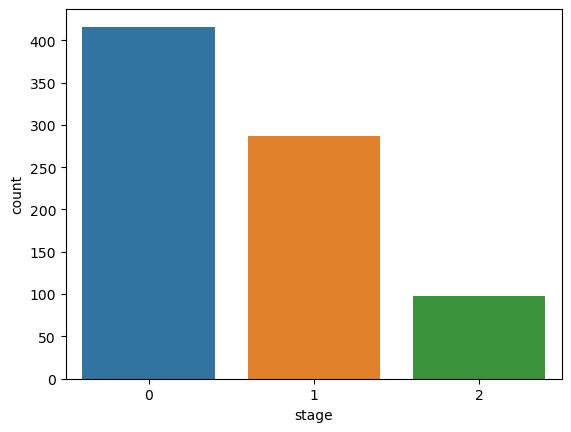

In [135]:
sns.countplot(x = 'stage', data=dataset)

This sees the dataset being **split in terms of the classes** that is meant to be predicted. The full dataset is quite **imbalanced** on the different classes, as Stage 0 (otherwise known as "Basic") has the most amount of pokemon in it and the number decreases as you increase the Stage.

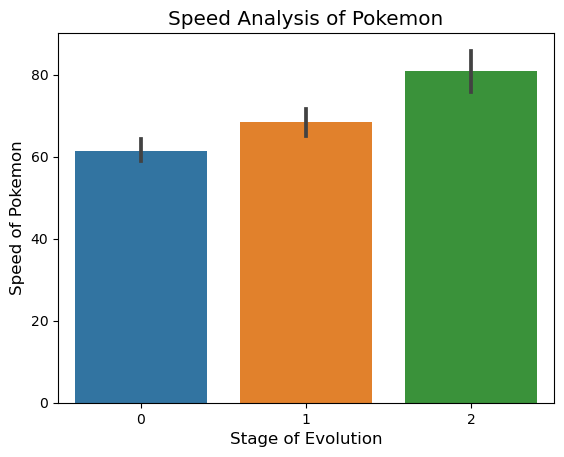

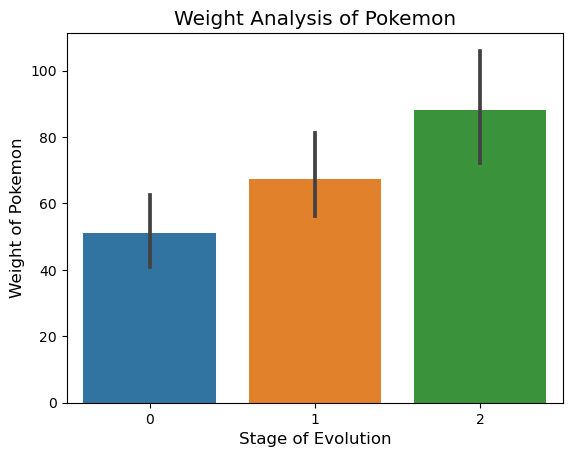

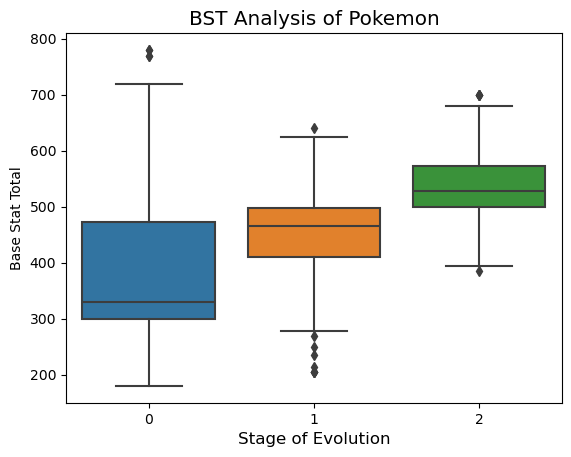

In [136]:
sns.barplot(x="stage",y="speed",data=dataset)
plt.title("Speed Analysis of Pokemon", fontsize='x-large')
plt.ylabel("Speed of Pokemon", fontsize='large')
plt.xlabel("Stage of Evolution", fontsize= 'large')
plt.show()
#So Speed is a good indicator

sns.barplot(x="stage",y="weight_kg",data=dataset)
plt.title("Weight Analysis of Pokemon", size='x-large')
plt.ylabel("Weight of Pokemon", size='large')
plt.xlabel("Stage of Evolution", size= 'large')
plt.show()

sns.boxplot(data=dataset, x='stage', y='base_total')
plt.title("BST Analysis of Pokemon", size='x-large')
plt.ylabel('Base Stat Total')
plt.xlabel("Stage of Evolution", size= 'large')
plt.show()


These graphs outline the **count** and **variance** of the data within the set based on some of the columns. This outlines that the **Speed** and **Weight** are good indicators for the class separation as the average for each stage are different from each other, but the range is do overlap with each other which makes the *classification harder*. 

This is the same for the **Base Stat Total** for the dataset, but the box plot shows that they are starkly different from each other, as the average is outside of the box range for all the classes. However, it shows that the range of 0 has the widest and the most anomalies on the top end as it includes **"Legendary"** pokemon (since they don't evolve or have pre-evolutions, they are at Basic), but the column *is_legendary* allows for the model to make that connection as well.

### Examination & Cleaning of Data <a id = "clean"></a>

In [137]:
#Cleaning the datset
num_df = dataset.select_dtypes(exclude=['object'])
num_df.corr()


,pokedex_number,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,base_total,hp,attack,defense,sp_attack,sp_defense,speed,generation,is_legendary,stage
pokedex_number,1.000000,0.004618,0.009066,0.000872,-0.068552,0.176651,0.018296,0.052012,0.020324,0.063189,...,0.140363,0.108079,0.137633,0.102412,0.109285,0.093848,0.004294,0.985904,0.208686,-0.075172
against_bug,0.004618,1.000000,0.230107,0.165430,-0.246943,0.239566,0.137902,0.202778,0.183343,0.129174,...,-0.012398,0.034897,-0.054175,-0.036474,0.055352,-0.002342,-0.043802,-0.001549,0.027424,-0.010344
against_dark,0.009066,0.230107,1.000000,0.140830,-0.015830,-0.301354,-0.357981,0.010527,-0.179697,0.672337,...,0.065446,0.010589,-0.098849,0.048039,0.170849,0.132507,-0.000326,-0.016013,0.132062,-0.029042
against_dragon,0.000872,0.165430,0.140830,1.000000,-0.108928,0.439705,0.035237,-0.261570,0.064850,-0.049941,...,0.069766,0.089721,0.138217,-0.023794,0.039739,-0.047416,0.078123,-0.025201,0.015717,0.015637
against_electric,-0.068552,-0.246943,-0.015830,-0.108928,1.000000,-0.089864,-0.102798,-0.279029,-0.111461,-0.073031,...,-0.017137,-0.035354,-0.104276,-0.072433,0.022305,0.019193,0.111422,-0.063180,-0.017561,-0.047226
against_fairy,0.176651,0.239566,-0.301354,0.439705,-0.089864,1.000000,0.157712,-0.169489,0.199862,-0.120806,...,0.098948,0.129284,0.207526,0.001655,-0.010296,0.002754,0.065401,0.150801,0.047504,0.022125
against_fight,0.018296,0.137902,-0.357981,0.035237,-0.102798,0.157712,1.000000,-0.076480,-0.318941,-0.546982,...,0.048629,0.109425,0.149123,0.150424,-0.118481,-0.044460,-0.050495,0.000681,-0.047110,-0.005400
against_fire,0.052012,0.202778,0.010527,-0.261570,-0.279029,-0.169489,-0.076480,1.000000,0.528127,0.050570,...,-0.061698,-0.099242,-0.005762,0.037921,-0.088578,-0.019520,-0.079129,0.061157,-0.016552,0.030039
against_flying,0.020324,0.183343,-0.179697,0.064850,-0.111461,0.199862,-0.318941,0.528127,1.000000,0.013204,...,-0.106586,-0.060624,-0.002991,-0.127950,-0.111243,-0.079022,-0.043381,0.058204,-0.065203,0.060406
against_ghost,0.063189,0.129174,0.672337,-0.049941,-0.073031,-0.120806,-0.546982,0.050570,0.013204,1.000000,...,0.114179,-0.062052,-0.034549,0.136490,0.233309,0.195439,-0.029007,0.038027,0.152344,0.021664


**Drops** all the columns that don't have numerical values such as *abilities*, *name* and *type* etc.

This pulls up the correlation of all the remaining columns in comparison to each other. This shows the correlation between *Legendary* & the *Stage*, as I have brought up before at **-0.237**.

pokedex_number      -0.075172
against_bug         -0.010344
against_dark        -0.029042
against_dragon       0.015637
against_electric    -0.047226
against_fairy        0.022125
against_fight       -0.005400
against_fire         0.030039
against_flying       0.060406
against_ghost        0.021664
against_grass       -0.014069
against_ground       0.010729
against_ice          0.065192
against_normal      -0.001207
against_poison       0.004605
against_psychic      0.041470
against_rock         0.004763
against_steel       -0.035938
against_water        0.007578
percentage_male      0.065338
base_egg_steps      -0.204120
base_happiness       0.076049
weight_kg            0.114071
experience_growth   -0.038972
height_m             0.208682
base_total           0.438835
hp                   0.327793
attack               0.328441
defense              0.253647
sp_attack            0.332262
sp_defense           0.295886
speed                0.214989
generation          -0.044139
is_legenda

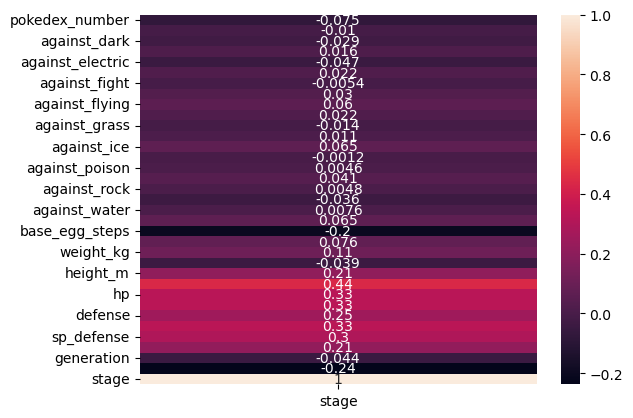

In [138]:
sns.heatmap(num_df.corr()[['stage']], annot = True)
num_df.corr()['stage']

This is a heatmap of all the correlations between the **columns** and the **stage column** which is the one that is getting predicted.

The correlations very close to 0 are essentially not useful as it means that they have **no correlation** with the output. This means that all the type match-up columns (all the ones that have against_*type*), plus thematically it doesn't make sense as the type doesn't effect whether it evolves. This is the same for *experience_growth* as that is dependent on the species not the stage of evolution and the correlation is -0.039. 

All the correlation that has a **correlation of less than 0.1** are getting **dropped** as they have almost no correlation, this doesn't include negative values as **negative correlation** can be just as helpful as a postive correlation. So correlations between **0.1 & -0.1** are getting removed, so columns like *is_legendary* & *base_egg_steps* can stay.

<Axes: >

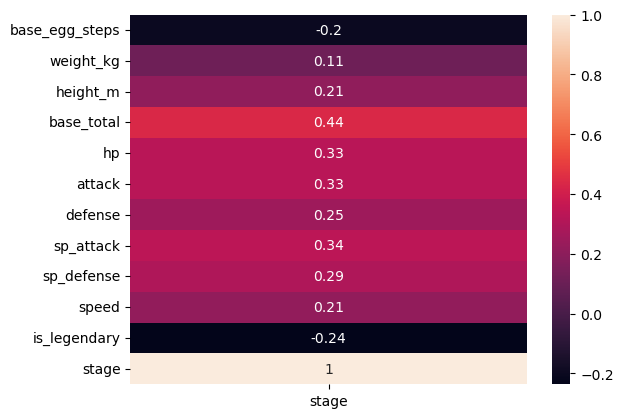

In [139]:
#remove all the type matchup colums (all of them are labelled against_**type**)
no_type_df = num_df.drop(num_df.filter(regex='against').columns, axis=1)

#dropping column that has a correlation of less than 0.1
dataset_cleaned = no_type_df.drop(['pokedex_number', 
                                    'percentage_male', 
                                    'base_happiness', 
                                    'experience_growth', 
                                    'generation'], axis=1)
#Drop NaN values
dataset_cleaned = dataset_cleaned.dropna()

sns.heatmap(dataset_cleaned.corr()[['stage']], annot = True)

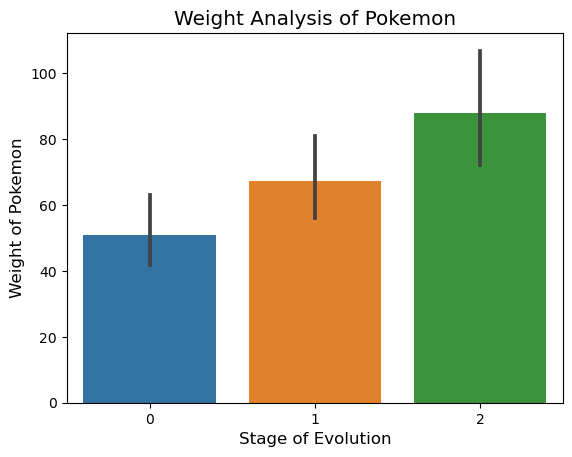

In [140]:
sns.barplot(x="stage",y="weight_kg",data=dataset_cleaned)

plt.title("Weight Analysis of Pokemon", size='x-large')
plt.ylabel("Weight of Pokemon", size='large')
plt.xlabel("Stage of Evolution", size= 'large')
plt.show()


This is just rechecking the weight column as it is the only one that has a correlation of less than 0.2 (on the positive end), it shows that there is a decent bit of overlap but I think it should still be fine for this.


In [141]:
print(dataset_cleaned.shape)
dataset_cleaned.head()

(781, 12)


,base_egg_steps,weight_kg,height_m,base_total,hp,attack,defense,sp_attack,sp_defense,speed,is_legendary,stage
0,5120,6.9,0.7,318,45,49,49,65,65,45,0,0
1,5120,13.0,1.0,405,60,62,63,80,80,60,0,1
2,5120,100.0,2.0,625,80,100,123,122,120,80,0,2
3,5120,8.5,0.6,309,39,52,43,60,50,65,0,0
4,5120,19.0,1.1,405,58,64,58,80,65,80,0,1


<Axes: xlabel='stage', ylabel='count'>

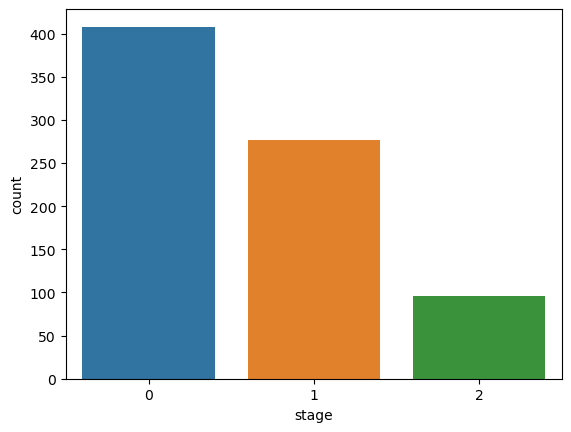

In [142]:
sns.countplot(x = 'stage', data=dataset_cleaned)

After all the data processing and clearing, this is the final version. 

This is just checking that there is still approximately the same distribution between all the *Stages* still in the dataset, since the rows with missing data were removed.

In [143]:
#Split data into input and labels
X = dataset_cleaned.iloc[:, :-1]
y = dataset_cleaned.iloc[:, -1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, stratify=y)
print(y_train.describe())
print(y_test.describe())

count    546.000000
mean       0.600733
std        0.697255
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: stage, dtype: float64
count    235.000000
mean       0.600000
std        0.699206
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: stage, dtype: float64


Text(0.5, 1.0, 'Class Distribution in Test Set')

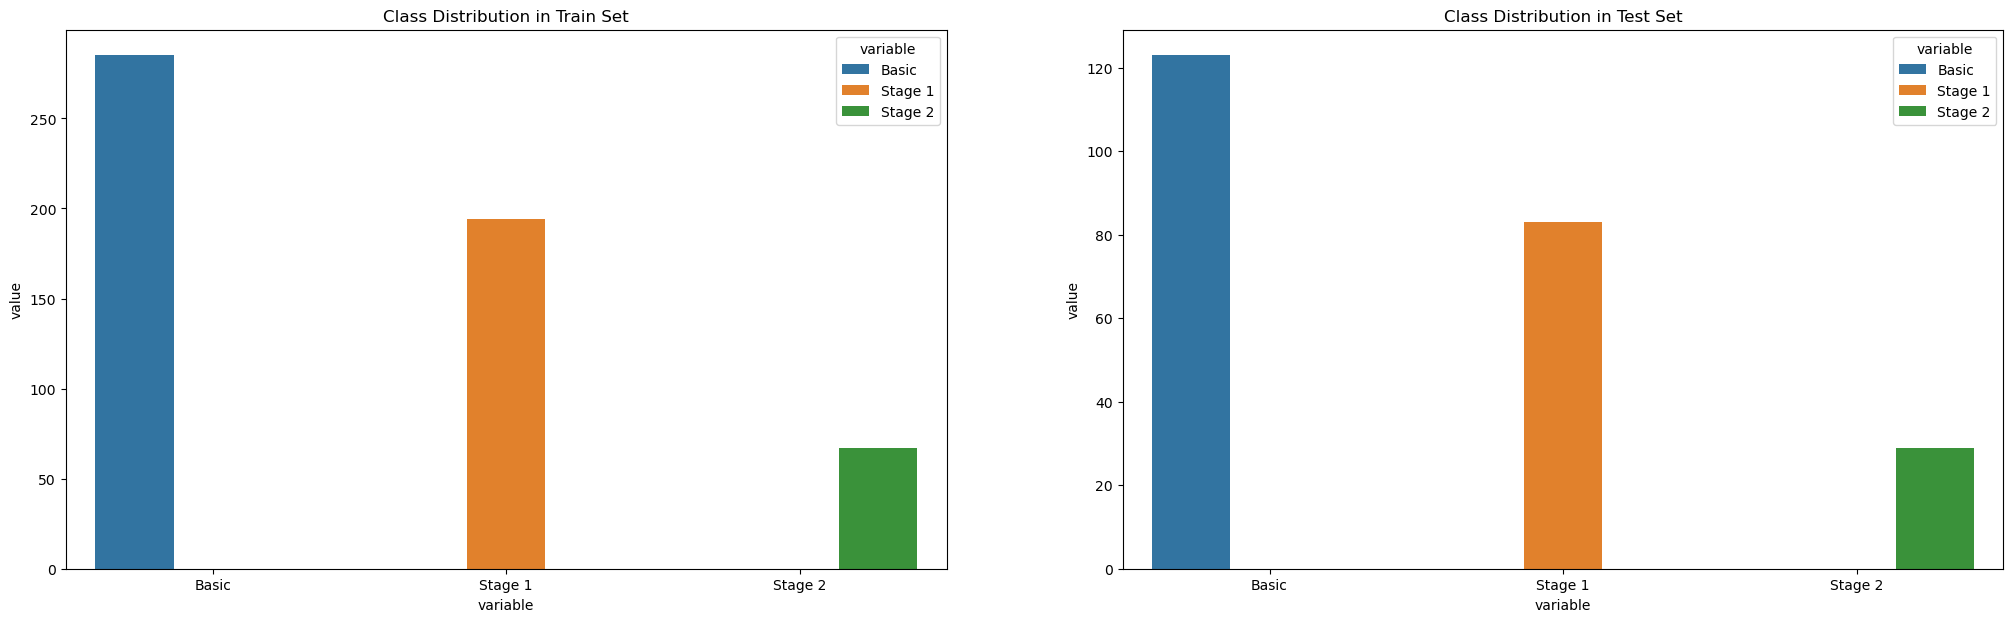

In [144]:
#Makes sure that the different classes are evenly distributed
#Function from source[1]
def get_class_distribution(obj):
    count_dict = {
        "Basic": 0,
        "Stage 1": 0,
        "Stage 2": 0,
    }
    
    for i in obj:
        if i == 0: 
            count_dict['Basic'] += 1
        elif i == 1: 
            count_dict['Stage 1'] += 1
        elif i == 2: 
            count_dict['Stage 2'] += 1             
        else:
            print("Check classes.")
            
    return count_dict

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')
# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Test Set')
#source [1]: https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab

The data was split using the last column (y) as the output, while all the other columns become the input (x). 
All the data gets split into Training & Testing data by using *train_test_split()*, 30% of the set becomes testing and stratify is used to have an equal distribution of the output classes in both training and testing sets.

This function here allows you to check and visualise the distrubtion in both the training and testing dataset, which is also backed up by mean and standard deviation of both sets being practically equal.

### Data Transformation <a id = "transform"></a>

In [145]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

#scaler = MinMaxScaler()
scaler = StandardScaler()
#(possible to change)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

To improve the performance of the model, the data is standardised. The data is scaled along the same range using *StandardScaler()*, where every value in the column is normalised by subtracting the mean (0) and divinding by the standard deviation (1).

This only works if you know that the data distribution is normal, and since this dataset was one that was found online, another tutorial **"https://medium.com/@boris.meinardus/binary-classification-with-pytorch-and-pokémon-part-1-288cf7a852c0"** used this scaler so I made the assumption that it was normally distributed based on that. Otherwise, you would use *MinMaxScaler()* to be safe, as it preserves the shape of the dataset.

### Building the Dataset <a id = "build"></a>

In [146]:
#Dataset class
class ClassificationData(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.x_data)

train_data = ClassificationData(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
test_data = ClassificationData(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

This is the custom Dataset that will be used by the *Dataloader* to pass the data into the model.

The dataset is intialised by giving *train_data* & *test_data* the inputs x (input data) and y (labels).

## Neural Network Modelling <a id = "nn"></a>

### Static Parameters <a id = "static"></a>

In [147]:

INPUT_SIZE = len(X.columns)
NUM_CLASSES = 3
classes = ('Basic', 'Stage 1', 'Stage 2')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


These are the parameters that will stay constant throughout every single iteration and version of the model created so they are defined away from the hyperparameters that are subject to changes.

The *INPUT_SIZE* is the number of columns that are being used as the input to predict the Stage, and *NUM_CLASSSES = 3* as those are the only 3 possible classes that it can predict being **Basic**, **Stage 1** & **Stage 2**.

*Device* is for checking whether the GPU is active for much less intensive modelling.

### Neural Network Model - 3 Layers <a id = "3lay"></a>

In [148]:
# Neural Network model - 3 Layers

class PokemonClassificationModel_3L(nn.Module):
    def __init__(self, input_size, num_classes):
        super(PokemonClassificationModel_3L, self).__init__()

        self.layer1 = nn.Linear(input_size, 128)  #values chosen at my discrection
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64,32)
        self.out = nn.Linear(32, num_classes)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.batchnorm3 = nn.BatchNorm1d(32)

    def forward(self, x):
        x = self.layer1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.out(x)
        return x

This version of the Neural Network uses 3 Layers for a feed-forward network, this is to check whether the amount of hidden layers affects the performnace of the model as well as altering the hyperparameters.

The Network uses *Dropout* - which is a technique where you remove units in a neural network to simulate large numbers of architectures simultaneously, it reduces the chance of overfitting during training, and that helps the accuracy of the model. (Shukla, 2020)

It also uses *Batch Normalisation* - it normalises the inputs to each layer (at every layer), so that the values entered have a similar scale, it's used for the network to learn and converge faster. (Educative, n.d.)

### Neural Network Model - 4 Layers <a id = "4lay"></a>

In [149]:
# Neural Network model - 4 Layers

class PokemonClassificationModel_4L(nn.Module):
    def __init__(self, input_size, num_classes):
        super(PokemonClassificationModel_4L, self).__init__()

        self.layer1 = nn.Linear(input_size, 512)  #values chosen at my discrection
        self.layer2 = nn.Linear(512,128)
        self.layer3 = nn.Linear(128,64)
        self.layer4 = nn.Linear(64,32)
        self.out = nn.Linear(32, num_classes)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        self.batchnorm4 = nn.BatchNorm1d(32)

    def forward(self, x):
        x = self.layer1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer4(x)
        x = self.batchnorm4(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.out(x)
        return x

This version has 4 layers.

The first Linear layer has many more nodes that is conncets to compared to the 3 layer model, **512 compared to 128**, and everything is scaled to that for the first layer, then the next 3 layers are pretty much identical to the 3 Layer version of the model.

The value of the *Dropout* also got increased to 0.2 - to see if that makes a bit more of a difference, but it will also make the training take longer.


### Class Accuracy <a id = "acc"></a>

In [150]:
# Accuracy Check
#source this
def multi_class_accuracy(y_predicted, y_test):
    y_pred_softmax = torch.log_softmax(y_predicted, dim=1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

This is a function that is used during the training of the Neural Network.

It takes the actual outputs and the predicted values that the model produced and outputs a percentage value of how accurate the prediction the model made. In this *log_softmax* is applied to the predicted value so that it will extract the class that has the higher probability, then the max is taken. 

## DataLoader, Training & Evaluating the Neural Network <a id = "train"></a>

In [151]:
#Training for the NN
def network_pkmn(epoch, batch_Size, learning_rate, layer):

    # Dataloader
    train_loader = DataLoader(dataset=train_data,
                              batch_size=batch_Size,
                              shuffle=True
                             )
    test_loader = DataLoader(dataset=test_data,
                              batch_size=1)

    if layer == 3:
        model = PokemonClassificationModel_3L(input_size=INPUT_SIZE,
                                              num_classes=NUM_CLASSES) #uses the 3 Layer class version 
    else:
        model = PokemonClassificationModel_4L(input_size=INPUT_SIZE,
                                              num_classes=NUM_CLASSES) #uses the 4 Layer class version    
    
    model.to(device)
    #weight=class_weights.to(device)
    #Loss & optimizer
    loss = nn.CrossEntropyLoss()
    optim = Adam(model.parameters(), lr=learning_rate)
    print(model)
    
    accuracy_stats = {
        'train': []
    }
    loss_stats = {
        'train': []
    }
    #These hold the accuracy & the loss of each epoch so that it can be used in plotting the graph
    out_data = {
        'Accuracy': 0,
        'Test': [],
        'Predicted': [],
        'Model': 0
    }
    
    print("Begin training...")
    
    model.train() #necessary for dropout & batchnorm as they act differently for training and evaluation
    
    for e in tqdm(range(1, epoch+1)):
        #tqdm is the module that allows the epoch to show a progress bar in repect to the whole training session
        epoch_loss = 0
        epoch_acc = 0
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    
            optim.zero_grad()
    
            y_predicted = model(x_batch) #uses the model
            
            t_loss = loss(y_predicted, y_batch) #applies the loss function of Cross Entropy
            t_acc = multi_class_accuracy(y_predicted, y_batch) #does the accuracy check
    
            t_loss.backward()
            optim.step()
    
            epoch_loss += t_loss.item()
            epoch_acc += t_acc.item()
    
        loss_stats['train'].append(epoch_loss/len(train_loader))
        
        accuracy_stats['train'].append(epoch_acc/len(train_loader))

        #for every epoch the accuracy & loss is saved to allow for the progress of the training to be plotted
        
    
        print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')
    
    print("Training Complete")

    #source

    # Create dataframes
    train_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    train_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    # Plot the dataframes
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
    sns.lineplot(data=train_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Training Accuracy/Epoch')
    sns.lineplot(data=train_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Training Loss/Epoch')
    plt.show()

    #source [] https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab

    out_data['Accuracy'] = accuracy_stats['train'][-1]
    #this gets the most recent accuracy of the model

    #Evaluate Model
    #source
    y_pred_list = []
    with torch.no_grad():
        model.eval()
        for X_batch, _ in test_loader:
            X_batch = X_batch.to(device)
            y_test_pred = model(X_batch)
            _, y_pred_tags = torch.max(y_test_pred, dim = 1)
            
            y_pred_list.append(y_pred_tags.cpu().numpy())
        #print(y_pred_list[0])
      
    y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
    #source [] https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab
    

    out_data['Test'] = y_test.tolist()
    out_data['Predicted'] = y_pred_list
    out_data['Model'] = model

    return out_data

*nn.CrossEntropyLoss()* - for multiclass classification, gives a probability of it being in each class.

*model.train()* - this indicates to PyTorch that its training as **Dropout** and **BatchNorm** acts differently when in training and in evaluation, so *model.eval()* is called when it begins evaluting.

The **loss** & **accuracy** are set back to 0 for each epoch (that's the reason that it is saved to another list).

It goes through a loop that gets all the data from the *train_loader* and does *optim.zero_grad()* before making a prediction, then the loss and accuracy are jotted down. **Backpropagation** is then done after it makes a prediction using *loss.backward()* and *optim.step()*, for the loop of the train_loader, the average accuracy is taken for that epoch.

When evaluting the model made, *torch.no_grad()* so that no backpropagation takes place, for faster computation as it is not needed for evaluting the model. The data given from the evalution is added to the dictionary holding the output data including the model going into *out_data*. This allows the model and all the data to be saved for future comparison or reusing the model,as multiple different models are going to be done simultaneously with different hyperparameters.

### Visualisation of the Evaluation

In [152]:
def eval_reports(test, predicted):
    confusion_matrix_df = confusion_matrix(test, predicted)
    df_cm = pd.DataFrame(confusion_matrix_df / np.sum(confusion_matrix_df, axis=1)[:, None], index = [i for i in classes],
                         columns = [i for i in classes])
    
    sns.heatmap(df_cm)
    print(classification_report(test, predicted))

This takes the actual values and the predicted values of the evaluated model that was outputted by the *network_pkmn()* function. This is just to get a visual version of the data.

The **confusion matrix** outputs the predicted and actual data as a matrix that allows you to see if it was correctly classified and where all the data got classified and compares it to where it should have gone. If it got the correct classification but went to the wrong class or otherwise. The **heatmap** allows for the matrix to be colour coded so that it is much easier to read, even if you are given the values on it (the lighter the colour the more correct it was).

The classification report is another way of outputting the accuracy of the model as well. 
    
It gives the **precision** - that's the percentage of *correct predictions* relative to the total postive *predictions*. 
The **recall** - gives the percentage of *correct predictions* relative to the total *correct*. (Zach, 2022)

## **Hyperparameters** <a id = "hyp"></a>

### *Hyperparameters - Set 1* <a id = "set1"></a>

In [153]:
# Hyperparameters

EPOCHS_1 = 50
BATCH_SIZE_1 = 32
LEARNING_RATE_1 = 0.002


PokemonClassificationModel_3L(
  (layer1): Linear(in_features=11, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Begin training...


  4%|▍         | 2/50 [00:00<00:02, 17.22it/s]

Epoch 001: | Loss: 0.98442 | Acc: 52.667
Epoch 002: | Loss: 0.75497 | Acc: 71.000
Epoch 003: | Loss: 0.65855 | Acc: 71.333


  8%|▊         | 4/50 [00:00<00:02, 18.44it/s]

Epoch 004: | Loss: 0.68757 | Acc: 70.556
Epoch 005: | Loss: 0.59998 | Acc: 76.111


 12%|█▏        | 6/50 [00:00<00:02, 18.78it/s]

Epoch 006: | Loss: 0.53774 | Acc: 77.778
Epoch 007: | Loss: 0.59917 | Acc: 77.611


 16%|█▌        | 8/50 [00:00<00:02, 19.16it/s]

Epoch 008: | Loss: 0.58901 | Acc: 75.444
Epoch 009: | Loss: 0.55285 | Acc: 73.056
Epoch 010: | Loss: 0.47745 | Acc: 82.889


 22%|██▏       | 11/50 [00:00<00:01, 19.83it/s]

Epoch 011: | Loss: 0.55837 | Acc: 76.500
Epoch 012: | Loss: 0.51709 | Acc: 79.889


 28%|██▊       | 14/50 [00:00<00:01, 20.21it/s]

Epoch 013: | Loss: 0.47687 | Acc: 79.389
Epoch 014: | Loss: 0.48574 | Acc: 78.278
Epoch 015: | Loss: 0.49557 | Acc: 80.722
Epoch 016: | Loss: 0.44545 | Acc: 80.556


 34%|███▍      | 17/50 [00:00<00:01, 20.32it/s]

Epoch 017: | Loss: 0.57669 | Acc: 77.667


 40%|████      | 20/50 [00:01<00:01, 20.44it/s]

Epoch 018: | Loss: 0.43384 | Acc: 82.944
Epoch 019: | Loss: 0.47179 | Acc: 80.944
Epoch 020: | Loss: 0.49768 | Acc: 79.056
Epoch 021: | Loss: 0.44928 | Acc: 81.889
Epoch 022: | Loss: 0.47434 | Acc: 79.944


 46%|████▌     | 23/50 [00:01<00:01, 20.56it/s]

Epoch 023: | Loss: 0.52238 | Acc: 80.944
Epoch 024: | Loss: 0.41579 | Acc: 82.667


 52%|█████▏    | 26/50 [00:01<00:01, 20.42it/s]

Epoch 025: | Loss: 0.37275 | Acc: 85.556
Epoch 026: | Loss: 0.43653 | Acc: 82.833
Epoch 027: | Loss: 0.67556 | Acc: 77.056


 58%|█████▊    | 29/50 [00:01<00:01, 20.54it/s]

Epoch 028: | Loss: 0.55691 | Acc: 77.500
Epoch 029: | Loss: 0.42153 | Acc: 81.389
Epoch 030: | Loss: 0.42715 | Acc: 81.722
Epoch 031: | Loss: 0.35276 | Acc: 85.556


 64%|██████▍   | 32/50 [00:01<00:00, 20.51it/s]

Epoch 032: | Loss: 0.44447 | Acc: 81.833
Epoch 033: | Loss: 0.38142 | Acc: 83.444
Epoch 034: | Loss: 0.43209 | Acc: 81.667


 70%|███████   | 35/50 [00:01<00:00, 20.56it/s]

Epoch 035: | Loss: 0.41361 | Acc: 84.611
Epoch 036: | Loss: 0.40525 | Acc: 84.111
Epoch 037: | Loss: 0.38120 | Acc: 84.889


 76%|███████▌  | 38/50 [00:01<00:00, 20.68it/s]

Epoch 038: | Loss: 0.35463 | Acc: 85.889
Epoch 039: | Loss: 0.34468 | Acc: 86.333


 82%|████████▏ | 41/50 [00:02<00:00, 20.64it/s]

Epoch 040: | Loss: 0.44911 | Acc: 80.611
Epoch 041: | Loss: 0.33392 | Acc: 85.444
Epoch 042: | Loss: 0.34044 | Acc: 85.944


 88%|████████▊ | 44/50 [00:02<00:00, 20.65it/s]

Epoch 043: | Loss: 0.35243 | Acc: 84.722
Epoch 044: | Loss: 0.42032 | Acc: 85.611
Epoch 045: | Loss: 0.34150 | Acc: 87.722
Epoch 046: | Loss: 0.30957 | Acc: 88.556


 94%|█████████▍| 47/50 [00:02<00:00, 20.65it/s]

Epoch 047: | Loss: 0.32262 | Acc: 86.333
Epoch 048: | Loss: 0.34777 | Acc: 84.611
Epoch 049: | Loss: 0.31559 | Acc: 88.000


100%|██████████| 50/50 [00:02<00:00, 20.33it/s]

Epoch 050: | Loss: 0.44206 | Acc: 81.833
Training Complete



C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


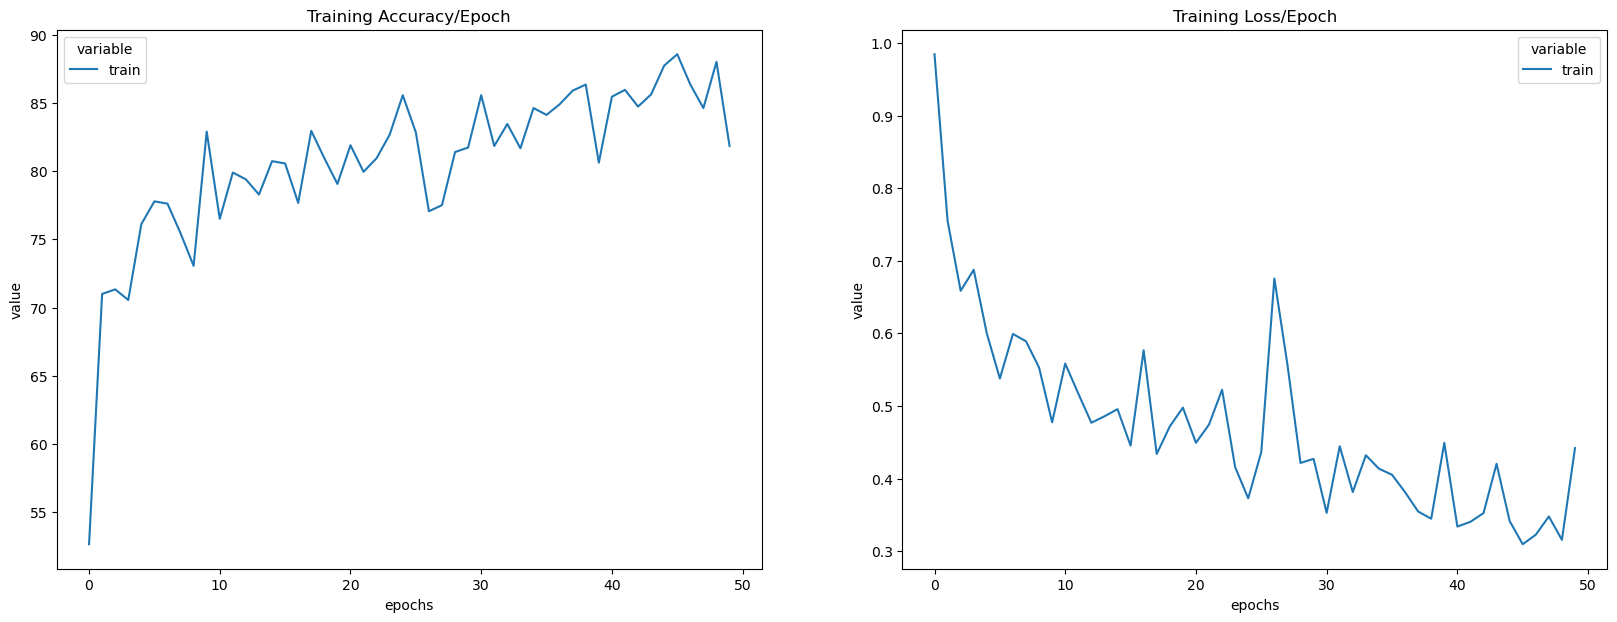

In [154]:
#Using the 3 Layer Network 
net1_a = network_pkmn(EPOCHS_1, BATCH_SIZE_1, LEARNING_RATE_1, 3)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       123
           1       0.67      0.80      0.73        83
           2       0.70      0.55      0.62        29

    accuracy                           0.78       235
   macro avg       0.75      0.72      0.73       235
weighted avg       0.79      0.78      0.78       235



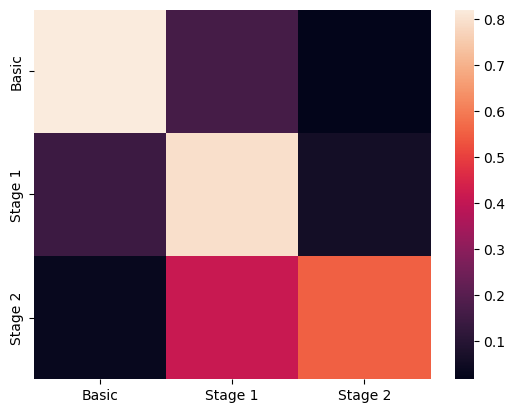

In [155]:
#Outputting the visual evaluation for 3L using the HP Set 1
eval_reports(net1_a['Test'], net1_a['Predicted'])

Outputs the accuracy and loss of all the epochs using the hyperparameters entered. The graph of the model is outputted as well as the visual represenation of the data being the **classification report** and the **heatmap of the confusion matrix** for the model that has *3 Layers*.

PokemonClassificationModel_4L(
  (layer1): Linear(in_features=11, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Begin training...


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 001: | Loss: 0.90405 | Acc: 61.833


  4%|▍         | 2/50 [00:00<00:04, 11.23it/s]

Epoch 002: | Loss: 0.75613 | Acc: 69.111
Epoch 003: | Loss: 0.64446 | Acc: 75.944


  8%|▊         | 4/50 [00:00<00:03, 12.19it/s]

Epoch 004: | Loss: 0.70847 | Acc: 71.500
Epoch 005: | Loss: 0.57899 | Acc: 75.833


 12%|█▏        | 6/50 [00:00<00:03, 12.05it/s]

Epoch 006: | Loss: 0.60502 | Acc: 74.444
Epoch 007: | Loss: 0.58516 | Acc: 75.111


 16%|█▌        | 8/50 [00:00<00:03, 12.13it/s]

Epoch 008: | Loss: 0.57576 | Acc: 74.944
Epoch 009: | Loss: 0.56426 | Acc: 74.389


 20%|██        | 10/50 [00:00<00:03, 12.51it/s]

Epoch 010: | Loss: 0.56749 | Acc: 75.556
Epoch 011: | Loss: 0.58506 | Acc: 76.667


 24%|██▍       | 12/50 [00:00<00:03, 12.42it/s]

Epoch 012: | Loss: 0.55553 | Acc: 77.944
Epoch 013: | Loss: 0.58228 | Acc: 74.556


 28%|██▊       | 14/50 [00:01<00:02, 12.73it/s]

Epoch 014: | Loss: 0.58135 | Acc: 76.889
Epoch 015: | Loss: 0.48040 | Acc: 79.778


 32%|███▏      | 16/50 [00:01<00:02, 12.68it/s]

Epoch 016: | Loss: 0.44183 | Acc: 83.167
Epoch 017: | Loss: 0.43820 | Acc: 83.167


 36%|███▌      | 18/50 [00:01<00:02, 12.77it/s]

Epoch 018: | Loss: 0.44178 | Acc: 82.722
Epoch 019: | Loss: 0.48625 | Acc: 78.500


 40%|████      | 20/50 [00:01<00:02, 12.78it/s]

Epoch 020: | Loss: 0.47239 | Acc: 80.722
Epoch 021: | Loss: 0.47090 | Acc: 79.111


 44%|████▍     | 22/50 [00:01<00:02, 12.89it/s]

Epoch 022: | Loss: 0.58168 | Acc: 79.389
Epoch 023: | Loss: 0.57022 | Acc: 76.611


 48%|████▊     | 24/50 [00:01<00:02, 12.97it/s]

Epoch 024: | Loss: 0.46587 | Acc: 79.389
Epoch 025: | Loss: 0.47082 | Acc: 81.722


 52%|█████▏    | 26/50 [00:02<00:01, 12.94it/s]

Epoch 026: | Loss: 0.51207 | Acc: 79.222
Epoch 027: | Loss: 0.44289 | Acc: 81.111


 56%|█████▌    | 28/50 [00:02<00:01, 13.08it/s]

Epoch 028: | Loss: 0.43634 | Acc: 83.722
Epoch 029: | Loss: 0.47784 | Acc: 79.889


 60%|██████    | 30/50 [00:02<00:01, 13.27it/s]

Epoch 030: | Loss: 0.69708 | Acc: 80.778
Epoch 031: | Loss: 0.45259 | Acc: 83.000


 64%|██████▍   | 32/50 [00:02<00:01, 13.22it/s]

Epoch 032: | Loss: 0.42346 | Acc: 81.333
Epoch 033: | Loss: 0.43059 | Acc: 80.722


 68%|██████▊   | 34/50 [00:02<00:01, 13.24it/s]

Epoch 034: | Loss: 0.48302 | Acc: 77.944
Epoch 035: | Loss: 0.43038 | Acc: 82.667


 72%|███████▏  | 36/50 [00:02<00:01, 13.14it/s]

Epoch 036: | Loss: 0.41185 | Acc: 83.167
Epoch 037: | Loss: 0.33620 | Acc: 87.000


 76%|███████▌  | 38/50 [00:02<00:00, 13.24it/s]

Epoch 038: | Loss: 0.40289 | Acc: 82.333
Epoch 039: | Loss: 0.39770 | Acc: 83.056


 80%|████████  | 40/50 [00:03<00:00, 13.08it/s]

Epoch 040: | Loss: 0.33842 | Acc: 85.111
Epoch 041: | Loss: 0.31948 | Acc: 88.056


 84%|████████▍ | 42/50 [00:03<00:00, 13.09it/s]

Epoch 042: | Loss: 0.35985 | Acc: 85.889
Epoch 043: | Loss: 0.41033 | Acc: 84.500


 88%|████████▊ | 44/50 [00:03<00:00, 13.06it/s]

Epoch 044: | Loss: 0.42245 | Acc: 80.833
Epoch 045: | Loss: 0.46586 | Acc: 79.111


 92%|█████████▏| 46/50 [00:03<00:00, 12.98it/s]

Epoch 046: | Loss: 0.41277 | Acc: 84.167
Epoch 047: | Loss: 0.33994 | Acc: 87.000


 96%|█████████▌| 48/50 [00:03<00:00, 13.06it/s]

Epoch 048: | Loss: 0.46451 | Acc: 82.833
Epoch 049: | Loss: 0.46477 | Acc: 83.333


100%|██████████| 50/50 [00:03<00:00, 12.88it/s]
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


Epoch 050: | Loss: 0.40451 | Acc: 81.889
Training Complete


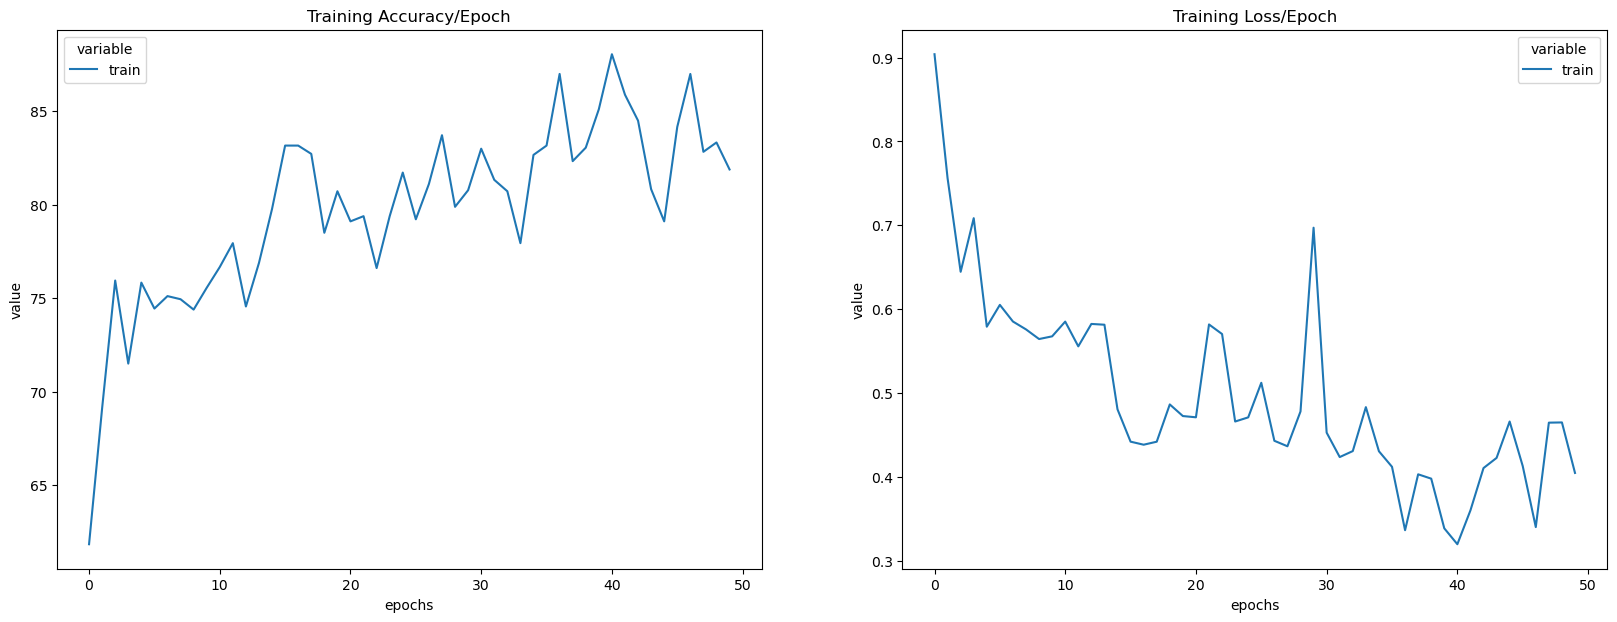

In [156]:
#Using the 4 Layer Network 
net2_a = network_pkmn(EPOCHS_1, BATCH_SIZE_1, LEARNING_RATE_1, 4)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       123
           1       0.68      0.81      0.74        83
           2       0.82      0.48      0.61        29

    accuracy                           0.79       235
   macro avg       0.79      0.71      0.73       235
weighted avg       0.80      0.79      0.78       235



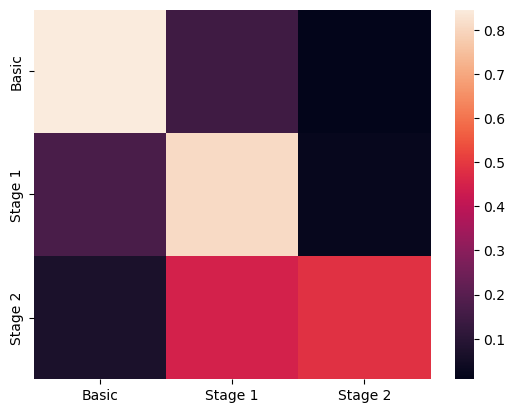

In [157]:
#Outputting the visual evaluation for 4L using the HP Set 1
eval_reports(net2_a['Test'], net2_a['Predicted'])

This uses the same hyperparameters as the earlier but it does the model using *4 layers* instead. To see if there is a difference using more layers.

### *Hyperparameters - Set 2* <a id = "set2"></a>

In [158]:
# Hyperparameters

EPOCHS_2 = 150
BATCH_SIZE_2 = 128
LEARNING_RATE_2 = 0.0002


PokemonClassificationModel_3L(
  (layer1): Linear(in_features=11, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Begin training...


  3%|▎         | 5/150 [00:00<00:03, 42.79it/s]

Epoch 001: | Loss: 1.11942 | Acc: 36.200
Epoch 002: | Loss: 1.07363 | Acc: 44.400
Epoch 003: | Loss: 0.98715 | Acc: 53.000
Epoch 004: | Loss: 0.94254 | Acc: 57.600
Epoch 005: | Loss: 0.89812 | Acc: 64.800
Epoch 006: | Loss: 0.86273 | Acc: 65.400
Epoch 007: | Loss: 0.85141 | Acc: 67.400
Epoch 008: | Loss: 0.81960 | Acc: 67.400
Epoch 009: | Loss: 0.79496 | Acc: 70.400


 11%|█▏        | 17/150 [00:00<00:02, 51.08it/s]

Epoch 010: | Loss: 0.76619 | Acc: 74.400
Epoch 011: | Loss: 0.75452 | Acc: 72.000
Epoch 012: | Loss: 0.75190 | Acc: 71.000
Epoch 013: | Loss: 0.73076 | Acc: 73.400
Epoch 014: | Loss: 0.72222 | Acc: 73.000
Epoch 015: | Loss: 0.70852 | Acc: 74.600
Epoch 016: | Loss: 0.71754 | Acc: 73.600
Epoch 017: | Loss: 0.73792 | Acc: 72.800
Epoch 018: | Loss: 0.69124 | Acc: 75.800
Epoch 019: | Loss: 0.67429 | Acc: 76.800
Epoch 020: | Loss: 0.67892 | Acc: 76.000
Epoch 021: | Loss: 0.66791 | Acc: 75.600


 15%|█▌        | 23/150 [00:00<00:02, 52.22it/s]

Epoch 022: | Loss: 0.69126 | Acc: 72.800
Epoch 023: | Loss: 0.67042 | Acc: 76.600
Epoch 024: | Loss: 0.65949 | Acc: 75.400
Epoch 025: | Loss: 0.67102 | Acc: 74.000
Epoch 026: | Loss: 0.67726 | Acc: 73.200
Epoch 027: | Loss: 0.63698 | Acc: 78.000
Epoch 028: | Loss: 0.62459 | Acc: 77.400


 19%|█▉        | 29/150 [00:00<00:02, 53.38it/s]

Epoch 029: | Loss: 0.62007 | Acc: 78.000
Epoch 030: | Loss: 0.63024 | Acc: 75.800
Epoch 031: | Loss: 0.65590 | Acc: 75.000
Epoch 032: | Loss: 0.62228 | Acc: 76.000
Epoch 033: | Loss: 0.61770 | Acc: 76.000


 23%|██▎       | 35/150 [00:00<00:02, 52.76it/s]

Epoch 034: | Loss: 0.59623 | Acc: 79.200
Epoch 035: | Loss: 0.59985 | Acc: 78.600
Epoch 036: | Loss: 0.61425 | Acc: 76.200
Epoch 037: | Loss: 0.57906 | Acc: 79.200
Epoch 038: | Loss: 0.59194 | Acc: 77.200
Epoch 039: | Loss: 0.57499 | Acc: 80.600
Epoch 040: | Loss: 0.61701 | Acc: 75.400


 27%|██▋       | 41/150 [00:00<00:02, 53.94it/s]

Epoch 041: | Loss: 0.58458 | Acc: 80.800
Epoch 042: | Loss: 0.58575 | Acc: 78.200
Epoch 043: | Loss: 0.57802 | Acc: 77.000
Epoch 044: | Loss: 0.58022 | Acc: 77.600
Epoch 045: | Loss: 0.57795 | Acc: 78.600
Epoch 046: | Loss: 0.57274 | Acc: 77.800


 31%|███▏      | 47/150 [00:00<00:01, 53.78it/s]

Epoch 047: | Loss: 0.59904 | Acc: 75.800
Epoch 048: | Loss: 0.57989 | Acc: 77.800
Epoch 049: | Loss: 0.55413 | Acc: 78.400
Epoch 050: | Loss: 0.54317 | Acc: 81.000
Epoch 051: | Loss: 0.58996 | Acc: 77.200
Epoch 052: | Loss: 0.57361 | Acc: 76.600


 35%|███▌      | 53/150 [00:01<00:01, 54.31it/s]

Epoch 053: | Loss: 0.56303 | Acc: 80.800
Epoch 054: | Loss: 0.54393 | Acc: 79.200
Epoch 055: | Loss: 0.56400 | Acc: 79.200
Epoch 056: | Loss: 0.52647 | Acc: 81.000
Epoch 057: | Loss: 0.53883 | Acc: 80.800


 39%|███▉      | 59/150 [00:01<00:01, 54.07it/s]

Epoch 058: | Loss: 0.53035 | Acc: 80.600
Epoch 059: | Loss: 0.51710 | Acc: 81.600
Epoch 060: | Loss: 0.56613 | Acc: 76.600
Epoch 061: | Loss: 0.51198 | Acc: 81.000
Epoch 062: | Loss: 0.49768 | Acc: 83.400
Epoch 063: | Loss: 0.50007 | Acc: 81.800
Epoch 064: | Loss: 0.52438 | Acc: 82.000


 43%|████▎     | 65/150 [00:01<00:01, 54.05it/s]

Epoch 065: | Loss: 0.53445 | Acc: 80.200
Epoch 066: | Loss: 0.49472 | Acc: 79.800
Epoch 067: | Loss: 0.50621 | Acc: 80.400
Epoch 068: | Loss: 0.50246 | Acc: 82.600


 47%|████▋     | 71/150 [00:01<00:01, 54.33it/s]

Epoch 069: | Loss: 0.51129 | Acc: 82.000
Epoch 070: | Loss: 0.50078 | Acc: 81.800
Epoch 071: | Loss: 0.49981 | Acc: 82.000
Epoch 072: | Loss: 0.48964 | Acc: 82.600
Epoch 073: | Loss: 0.49027 | Acc: 81.600
Epoch 074: | Loss: 0.47455 | Acc: 84.400
Epoch 075: | Loss: 0.47250 | Acc: 84.400
Epoch 076: | Loss: 0.47331 | Acc: 80.800


 51%|█████▏    | 77/150 [00:01<00:01, 53.79it/s]

Epoch 077: | Loss: 0.47252 | Acc: 83.000
Epoch 078: | Loss: 0.44842 | Acc: 85.600
Epoch 079: | Loss: 0.44536 | Acc: 84.600
Epoch 080: | Loss: 0.44466 | Acc: 83.800


 59%|█████▉    | 89/150 [00:01<00:01, 55.14it/s]

Epoch 081: | Loss: 0.46641 | Acc: 81.600
Epoch 082: | Loss: 0.48100 | Acc: 79.800
Epoch 083: | Loss: 0.49033 | Acc: 80.400
Epoch 084: | Loss: 0.46608 | Acc: 83.200
Epoch 085: | Loss: 0.45313 | Acc: 82.200
Epoch 086: | Loss: 0.45040 | Acc: 85.200
Epoch 087: | Loss: 0.43952 | Acc: 85.600
Epoch 088: | Loss: 0.45187 | Acc: 83.600
Epoch 089: | Loss: 0.43150 | Acc: 87.400
Epoch 090: | Loss: 0.44706 | Acc: 82.200
Epoch 091: | Loss: 0.46722 | Acc: 79.800
Epoch 092: | Loss: 0.44731 | Acc: 83.200


 63%|██████▎   | 95/150 [00:01<00:01, 53.76it/s]

Epoch 093: | Loss: 0.46001 | Acc: 81.400
Epoch 094: | Loss: 0.42269 | Acc: 84.800
Epoch 095: | Loss: 0.44400 | Acc: 84.600
Epoch 096: | Loss: 0.44805 | Acc: 82.400
Epoch 097: | Loss: 0.43954 | Acc: 81.200
Epoch 098: | Loss: 0.42821 | Acc: 83.400
Epoch 099: | Loss: 0.45471 | Acc: 79.800
Epoch 100: | Loss: 0.42154 | Acc: 83.000


 67%|██████▋   | 101/150 [00:01<00:00, 53.83it/s]

Epoch 101: | Loss: 0.41830 | Acc: 84.400
Epoch 102: | Loss: 0.42595 | Acc: 83.200
Epoch 103: | Loss: 0.43951 | Acc: 83.000
Epoch 104: | Loss: 0.42670 | Acc: 87.400


 71%|███████▏  | 107/150 [00:02<00:00, 54.03it/s]

Epoch 105: | Loss: 0.43852 | Acc: 82.600
Epoch 106: | Loss: 0.42634 | Acc: 81.400
Epoch 107: | Loss: 0.42524 | Acc: 83.200
Epoch 108: | Loss: 0.42309 | Acc: 86.000
Epoch 109: | Loss: 0.43755 | Acc: 84.400
Epoch 110: | Loss: 0.41246 | Acc: 85.000
Epoch 111: | Loss: 0.38101 | Acc: 87.800


 75%|███████▌  | 113/150 [00:02<00:00, 53.16it/s]

Epoch 112: | Loss: 0.37682 | Acc: 89.000
Epoch 113: | Loss: 0.37870 | Acc: 87.600
Epoch 114: | Loss: 0.38700 | Acc: 87.000
Epoch 115: | Loss: 0.38428 | Acc: 86.600


 79%|███████▉  | 119/150 [00:02<00:00, 52.84it/s]

Epoch 116: | Loss: 0.41565 | Acc: 83.800
Epoch 117: | Loss: 0.40928 | Acc: 86.200
Epoch 118: | Loss: 0.39154 | Acc: 86.000
Epoch 119: | Loss: 0.40667 | Acc: 84.000
Epoch 120: | Loss: 0.39661 | Acc: 84.800
Epoch 121: | Loss: 0.42539 | Acc: 83.200
Epoch 122: | Loss: 0.41650 | Acc: 84.200
Epoch 123: | Loss: 0.39878 | Acc: 86.000


 83%|████████▎ | 125/150 [00:02<00:00, 53.05it/s]

Epoch 124: | Loss: 0.39384 | Acc: 84.800
Epoch 125: | Loss: 0.40850 | Acc: 84.800
Epoch 126: | Loss: 0.40888 | Acc: 83.800
Epoch 127: | Loss: 0.36820 | Acc: 86.800


 87%|████████▋ | 131/150 [00:02<00:00, 53.62it/s]

Epoch 128: | Loss: 0.37352 | Acc: 85.800
Epoch 129: | Loss: 0.37678 | Acc: 86.400
Epoch 130: | Loss: 0.42525 | Acc: 83.200
Epoch 131: | Loss: 0.36754 | Acc: 86.600
Epoch 132: | Loss: 0.36146 | Acc: 85.000
Epoch 133: | Loss: 0.36979 | Acc: 86.200
Epoch 134: | Loss: 0.35191 | Acc: 88.800
Epoch 135: | Loss: 0.41248 | Acc: 85.200


 91%|█████████▏| 137/150 [00:02<00:00, 54.17it/s]

Epoch 136: | Loss: 0.35641 | Acc: 88.000
Epoch 137: | Loss: 0.35228 | Acc: 89.400
Epoch 138: | Loss: 0.36827 | Acc: 85.800
Epoch 139: | Loss: 0.37421 | Acc: 85.200


 95%|█████████▌| 143/150 [00:02<00:00, 53.25it/s]

Epoch 140: | Loss: 0.33529 | Acc: 87.600
Epoch 141: | Loss: 0.36935 | Acc: 86.200
Epoch 142: | Loss: 0.33908 | Acc: 88.600
Epoch 143: | Loss: 0.38559 | Acc: 86.000
Epoch 144: | Loss: 0.34822 | Acc: 88.000
Epoch 145: | Loss: 0.38194 | Acc: 85.400
Epoch 146: | Loss: 0.35787 | Acc: 86.600


100%|██████████| 150/150 [00:02<00:00, 53.39it/s]

Epoch 147: | Loss: 0.34624 | Acc: 86.600
Epoch 148: | Loss: 0.36309 | Acc: 86.200
Epoch 149: | Loss: 0.35721 | Acc: 86.000
Epoch 150: | Loss: 0.35350 | Acc: 87.600
Training Complete



C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


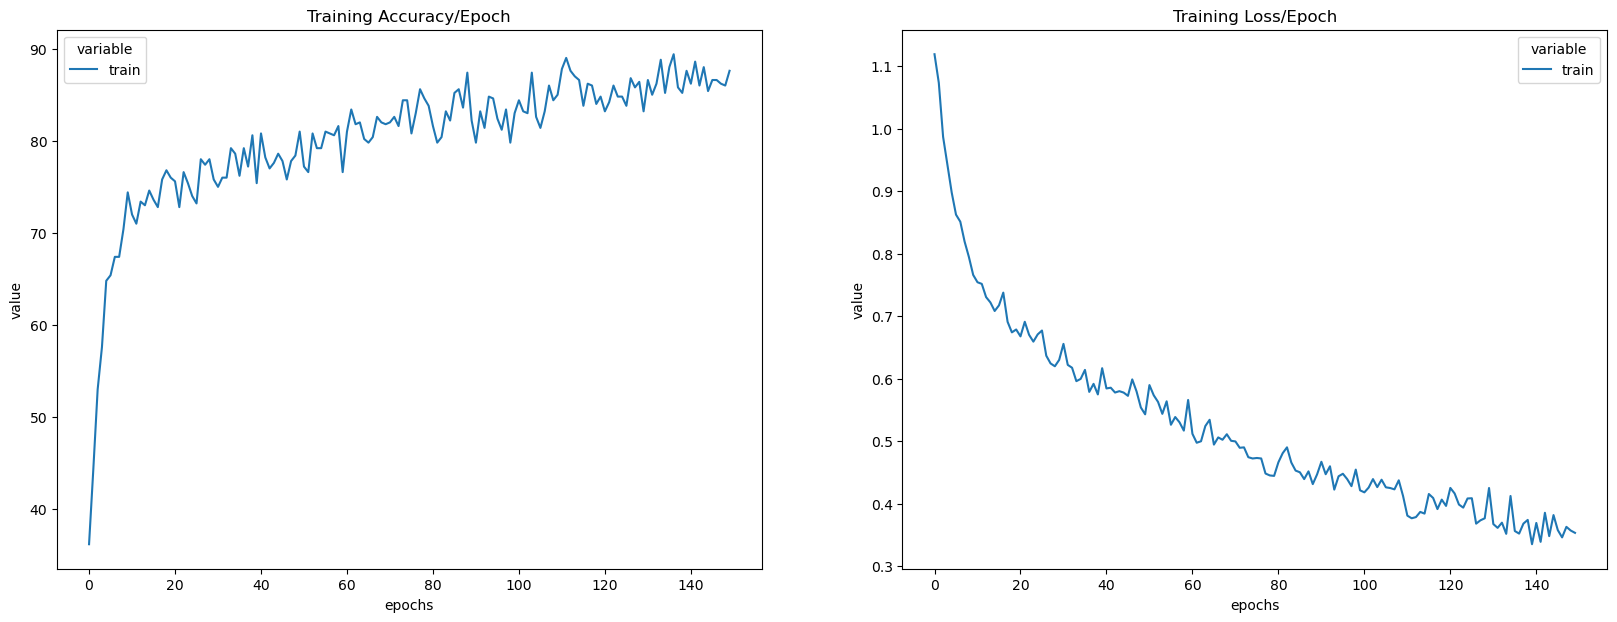

In [159]:
#Using the 3 Layer Network 
net1_b = network_pkmn(EPOCHS_2, BATCH_SIZE_2, LEARNING_RATE_2, 3)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       123
           1       0.68      0.76      0.72        83
           2       0.74      0.59      0.65        29

    accuracy                           0.78       235
   macro avg       0.76      0.73      0.74       235
weighted avg       0.78      0.78      0.78       235



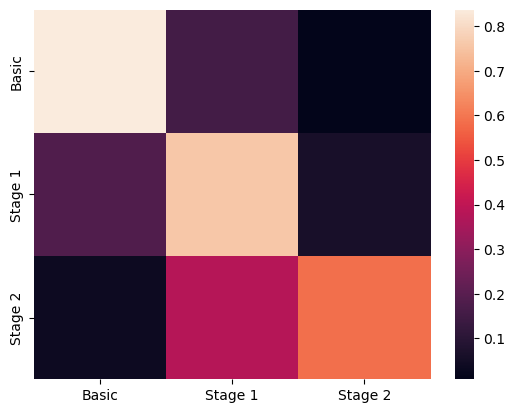

In [160]:
#Outputting the visual evaluation for 3L using the HP Set 2
eval_reports(net1_b['Test'], net1_b['Predicted'])

PokemonClassificationModel_4L(
  (layer1): Linear(in_features=11, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Begin training...


  2%|▏         | 3/150 [00:00<00:05, 28.28it/s]

Epoch 001: | Loss: 1.31792 | Acc: 16.800
Epoch 002: | Loss: 1.19279 | Acc: 21.000
Epoch 003: | Loss: 1.11009 | Acc: 29.000
Epoch 004: | Loss: 1.03726 | Acc: 42.400
Epoch 005: | Loss: 1.04647 | Acc: 43.200
Epoch 006: | Loss: 1.02351 | Acc: 47.800


  5%|▍         | 7/150 [00:00<00:04, 31.38it/s]

Epoch 007: | Loss: 0.97681 | Acc: 51.600
Epoch 008: | Loss: 0.96327 | Acc: 53.200
Epoch 009: | Loss: 0.93515 | Acc: 58.600
Epoch 010: | Loss: 0.90569 | Acc: 60.600
Epoch 011: | Loss: 0.89794 | Acc: 63.600


  7%|▋         | 11/150 [00:00<00:04, 32.93it/s]

Epoch 012: | Loss: 0.89677 | Acc: 64.800
Epoch 013: | Loss: 0.86352 | Acc: 66.200
Epoch 014: | Loss: 0.84711 | Acc: 64.200


 10%|█         | 15/150 [00:00<00:04, 32.97it/s]

Epoch 015: | Loss: 0.85811 | Acc: 65.400
Epoch 016: | Loss: 0.79946 | Acc: 72.000
Epoch 017: | Loss: 0.80694 | Acc: 68.600
Epoch 018: | Loss: 0.83056 | Acc: 67.400


 13%|█▎        | 19/150 [00:00<00:03, 33.71it/s]

Epoch 019: | Loss: 0.80427 | Acc: 68.000
Epoch 020: | Loss: 0.81215 | Acc: 68.400
Epoch 021: | Loss: 0.77066 | Acc: 73.200
Epoch 022: | Loss: 0.77460 | Acc: 73.000


 15%|█▌        | 23/150 [00:00<00:03, 34.26it/s]

Epoch 023: | Loss: 0.74270 | Acc: 76.600
Epoch 024: | Loss: 0.75045 | Acc: 72.000
Epoch 025: | Loss: 0.73689 | Acc: 73.400


 18%|█▊        | 27/150 [00:00<00:03, 34.52it/s]

Epoch 026: | Loss: 0.74973 | Acc: 75.000
Epoch 027: | Loss: 0.71940 | Acc: 75.600
Epoch 028: | Loss: 0.69424 | Acc: 77.400
Epoch 029: | Loss: 0.71229 | Acc: 74.000
Epoch 030: | Loss: 0.71500 | Acc: 77.000


 21%|██        | 31/150 [00:00<00:03, 34.69it/s]

Epoch 031: | Loss: 0.71433 | Acc: 78.200
Epoch 032: | Loss: 0.67243 | Acc: 78.400
Epoch 033: | Loss: 0.69213 | Acc: 76.000


 23%|██▎       | 35/150 [00:01<00:03, 34.71it/s]

Epoch 034: | Loss: 0.67422 | Acc: 78.600
Epoch 035: | Loss: 0.66200 | Acc: 78.200
Epoch 036: | Loss: 0.63798 | Acc: 80.000
Epoch 037: | Loss: 0.66424 | Acc: 77.200


 26%|██▌       | 39/150 [00:01<00:03, 34.63it/s]

Epoch 038: | Loss: 0.63288 | Acc: 78.800
Epoch 039: | Loss: 0.64601 | Acc: 79.000
Epoch 040: | Loss: 0.62530 | Acc: 81.200
Epoch 041: | Loss: 0.62378 | Acc: 79.400


 29%|██▊       | 43/150 [00:01<00:03, 34.95it/s]

Epoch 042: | Loss: 0.63622 | Acc: 80.000
Epoch 043: | Loss: 0.61107 | Acc: 80.000
Epoch 044: | Loss: 0.61316 | Acc: 78.800
Epoch 045: | Loss: 0.58796 | Acc: 81.000


 31%|███▏      | 47/150 [00:01<00:02, 34.98it/s]

Epoch 046: | Loss: 0.60696 | Acc: 81.400
Epoch 047: | Loss: 0.60304 | Acc: 80.200
Epoch 048: | Loss: 0.57294 | Acc: 80.400
Epoch 049: | Loss: 0.60099 | Acc: 82.200


 34%|███▍      | 51/150 [00:01<00:02, 35.00it/s]

Epoch 050: | Loss: 0.59763 | Acc: 79.400
Epoch 051: | Loss: 0.56771 | Acc: 81.600
Epoch 052: | Loss: 0.57911 | Acc: 83.200
Epoch 053: | Loss: 0.56825 | Acc: 82.600


 37%|███▋      | 55/150 [00:01<00:02, 34.56it/s]

Epoch 054: | Loss: 0.55410 | Acc: 80.000
Epoch 055: | Loss: 0.54384 | Acc: 80.800
Epoch 056: | Loss: 0.57606 | Acc: 80.200
Epoch 057: | Loss: 0.55956 | Acc: 82.000


 39%|███▉      | 59/150 [00:01<00:02, 34.71it/s]

Epoch 058: | Loss: 0.59042 | Acc: 79.600
Epoch 059: | Loss: 0.55402 | Acc: 82.200
Epoch 060: | Loss: 0.53244 | Acc: 81.400


 42%|████▏     | 63/150 [00:01<00:02, 34.63it/s]

Epoch 061: | Loss: 0.51009 | Acc: 85.200
Epoch 062: | Loss: 0.52697 | Acc: 82.200
Epoch 063: | Loss: 0.51920 | Acc: 82.600
Epoch 064: | Loss: 0.51986 | Acc: 84.000
Epoch 065: | Loss: 0.50556 | Acc: 84.400


 45%|████▍     | 67/150 [00:01<00:02, 34.13it/s]

Epoch 066: | Loss: 0.50934 | Acc: 81.800
Epoch 067: | Loss: 0.50983 | Acc: 82.200
Epoch 068: | Loss: 0.49762 | Acc: 84.800


 47%|████▋     | 71/150 [00:02<00:02, 34.40it/s]

Epoch 069: | Loss: 0.49253 | Acc: 83.000
Epoch 070: | Loss: 0.53226 | Acc: 83.000
Epoch 071: | Loss: 0.49382 | Acc: 82.200
Epoch 072: | Loss: 0.47331 | Acc: 86.400
Epoch 073: | Loss: 0.45884 | Acc: 86.400


 50%|█████     | 75/150 [00:02<00:02, 34.51it/s]

Epoch 074: | Loss: 0.44642 | Acc: 86.200
Epoch 075: | Loss: 0.47484 | Acc: 84.200


 53%|█████▎    | 79/150 [00:02<00:02, 34.85it/s]

Epoch 076: | Loss: 0.50027 | Acc: 82.400
Epoch 077: | Loss: 0.48422 | Acc: 83.400
Epoch 078: | Loss: 0.45603 | Acc: 85.600
Epoch 079: | Loss: 0.46839 | Acc: 83.600
Epoch 080: | Loss: 0.47270 | Acc: 84.200
Epoch 081: | Loss: 0.45180 | Acc: 87.000


 55%|█████▌    | 83/150 [00:02<00:01, 34.58it/s]

Epoch 082: | Loss: 0.43639 | Acc: 86.800
Epoch 083: | Loss: 0.44435 | Acc: 86.200


 58%|█████▊    | 87/150 [00:02<00:01, 34.19it/s]

Epoch 084: | Loss: 0.44425 | Acc: 86.000
Epoch 085: | Loss: 0.44687 | Acc: 84.400
Epoch 086: | Loss: 0.43145 | Acc: 86.400
Epoch 087: | Loss: 0.42196 | Acc: 85.200
Epoch 088: | Loss: 0.45249 | Acc: 84.400
Epoch 089: | Loss: 0.42411 | Acc: 86.600
Epoch 090: | Loss: 0.43187 | Acc: 86.400


 63%|██████▎   | 95/150 [00:02<00:01, 34.40it/s]

Epoch 091: | Loss: 0.41981 | Acc: 86.200
Epoch 092: | Loss: 0.42845 | Acc: 84.400
Epoch 093: | Loss: 0.40293 | Acc: 86.800
Epoch 094: | Loss: 0.40520 | Acc: 86.000
Epoch 095: | Loss: 0.41505 | Acc: 87.800
Epoch 096: | Loss: 0.40767 | Acc: 87.400
Epoch 097: | Loss: 0.39538 | Acc: 85.800
Epoch 098: | Loss: 0.42498 | Acc: 87.000


 69%|██████▊   | 103/150 [00:02<00:01, 34.81it/s]

Epoch 099: | Loss: 0.40240 | Acc: 87.200
Epoch 100: | Loss: 0.40824 | Acc: 86.400
Epoch 101: | Loss: 0.40077 | Acc: 85.200
Epoch 102: | Loss: 0.38123 | Acc: 88.200
Epoch 103: | Loss: 0.40138 | Acc: 88.400
Epoch 104: | Loss: 0.41152 | Acc: 86.600
Epoch 105: | Loss: 0.37030 | Acc: 89.000
Epoch 106: | Loss: 0.37445 | Acc: 87.800


 74%|███████▍  | 111/150 [00:03<00:01, 34.48it/s]

Epoch 107: | Loss: 0.35662 | Acc: 89.000
Epoch 108: | Loss: 0.36251 | Acc: 87.000
Epoch 109: | Loss: 0.35589 | Acc: 87.600
Epoch 110: | Loss: 0.37414 | Acc: 88.800
Epoch 111: | Loss: 0.37537 | Acc: 86.200
Epoch 112: | Loss: 0.35318 | Acc: 89.400
Epoch 113: | Loss: 0.38478 | Acc: 87.400
Epoch 114: | Loss: 0.33770 | Acc: 89.200


 77%|███████▋  | 115/150 [00:03<00:01, 33.77it/s]

Epoch 115: | Loss: 0.34636 | Acc: 87.400
Epoch 116: | Loss: 0.36803 | Acc: 87.800
Epoch 117: | Loss: 0.35893 | Acc: 87.800


 79%|███████▉  | 119/150 [00:03<00:00, 33.46it/s]

Epoch 118: | Loss: 0.40498 | Acc: 86.400
Epoch 119: | Loss: 0.36424 | Acc: 87.400
Epoch 120: | Loss: 0.32971 | Acc: 90.200
Epoch 121: | Loss: 0.36077 | Acc: 88.600


 82%|████████▏ | 123/150 [00:03<00:00, 33.01it/s]

Epoch 122: | Loss: 0.34842 | Acc: 89.800
Epoch 123: | Loss: 0.36007 | Acc: 88.800
Epoch 124: | Loss: 0.35978 | Acc: 87.800


 85%|████████▍ | 127/150 [00:03<00:00, 32.68it/s]

Epoch 125: | Loss: 0.32548 | Acc: 89.400
Epoch 126: | Loss: 0.33036 | Acc: 90.200
Epoch 127: | Loss: 0.34505 | Acc: 89.200
Epoch 128: | Loss: 0.34415 | Acc: 90.000
Epoch 129: | Loss: 0.35510 | Acc: 89.000


 87%|████████▋ | 131/150 [00:03<00:00, 33.03it/s]

Epoch 130: | Loss: 0.34276 | Acc: 88.000
Epoch 131: | Loss: 0.29920 | Acc: 91.000


 90%|█████████ | 135/150 [00:03<00:00, 32.70it/s]

Epoch 132: | Loss: 0.31999 | Acc: 88.200
Epoch 133: | Loss: 0.32789 | Acc: 88.000
Epoch 134: | Loss: 0.31529 | Acc: 90.600
Epoch 135: | Loss: 0.30628 | Acc: 90.600
Epoch 136: | Loss: 0.34161 | Acc: 87.200


 93%|█████████▎| 139/150 [00:04<00:00, 33.13it/s]

Epoch 137: | Loss: 0.29527 | Acc: 90.400
Epoch 138: | Loss: 0.30311 | Acc: 91.400
Epoch 139: | Loss: 0.29797 | Acc: 90.600


 95%|█████████▌| 143/150 [00:04<00:00, 33.34it/s]

Epoch 140: | Loss: 0.30300 | Acc: 90.400
Epoch 141: | Loss: 0.28636 | Acc: 92.000
Epoch 142: | Loss: 0.33101 | Acc: 90.400
Epoch 143: | Loss: 0.28412 | Acc: 90.400
Epoch 144: | Loss: 0.32513 | Acc: 90.000
Epoch 145: | Loss: 0.26249 | Acc: 93.200
Epoch 146: | Loss: 0.31218 | Acc: 89.800


100%|██████████| 150/150 [00:04<00:00, 33.91it/s]

Epoch 147: | Loss: 0.29712 | Acc: 91.600
Epoch 148: | Loss: 0.28140 | Acc: 90.400
Epoch 149: | Loss: 0.27828 | Acc: 92.800
Epoch 150: | Loss: 0.28669 | Acc: 89.800
Training Complete



C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


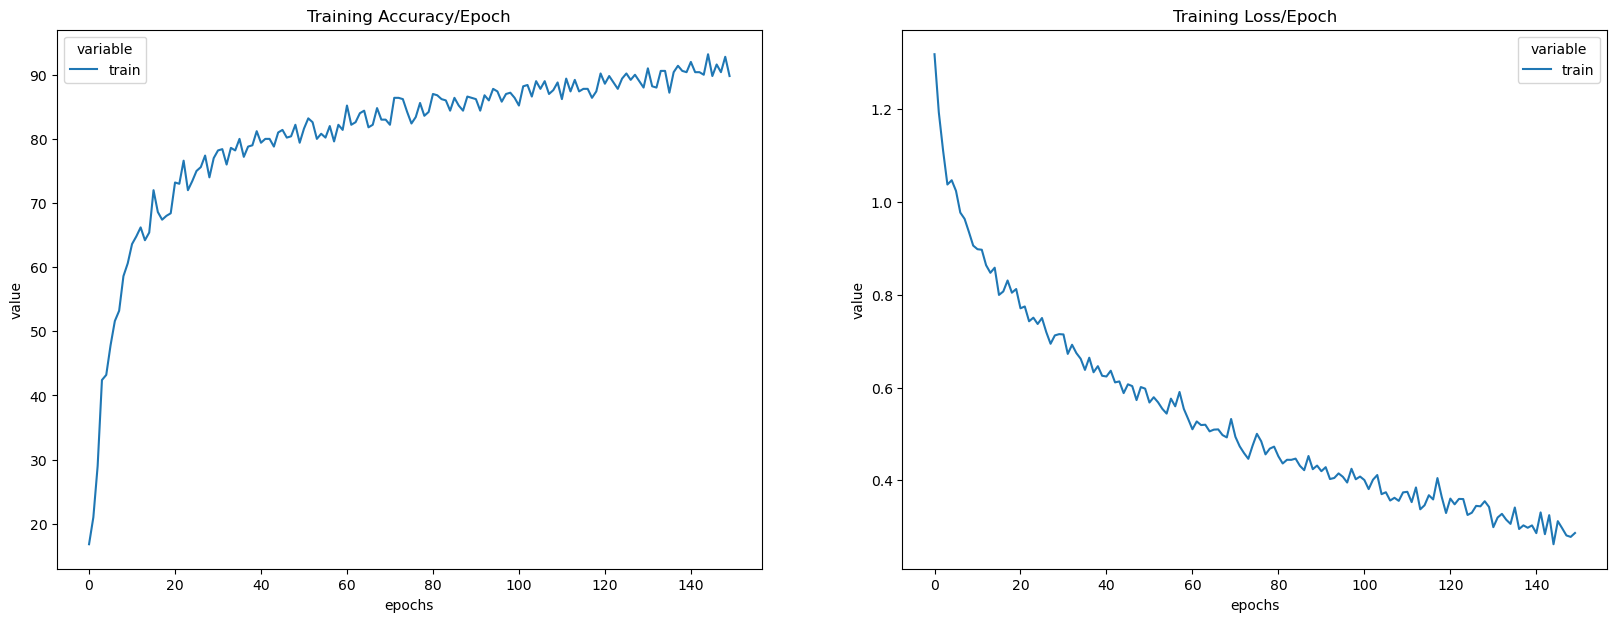

In [161]:
#Using the 4 Layer Network 
net2_b = network_pkmn(EPOCHS_2, BATCH_SIZE_2, LEARNING_RATE_2, 4)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       123
           1       0.69      0.80      0.74        83
           2       0.75      0.52      0.61        29

    accuracy                           0.79       235
   macro avg       0.77      0.72      0.74       235
weighted avg       0.79      0.79      0.79       235



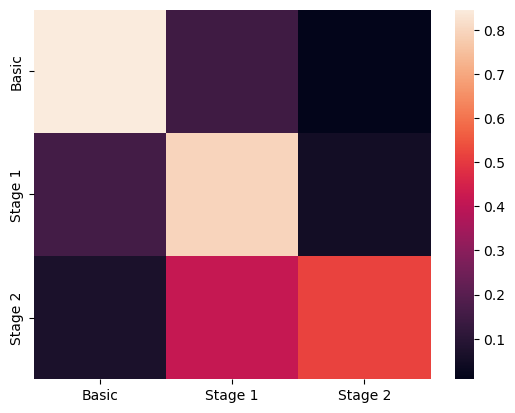

In [162]:
#Outputting the visual evaluation for 4L using the HP Set 2
eval_reports(net2_b['Test'], net2_b['Predicted'])

This uses a new set of hyperparameters of **Epochs**, **Batch Size** & **Learning Rate** for both a *3 Layer* & *4 Layer*, as well as visualising the data.

### *Hyperparameters - Set 3* <a id = "set3"></a>

In [163]:
# Hyperparameters

EPOCHS_3 = 300
BATCH_SIZE_3 = 256
LEARNING_RATE_3 = 0.0001


PokemonClassificationModel_3L(
  (layer1): Linear(in_features=11, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Begin training...


  2%|▏         | 6/300 [00:00<00:05, 55.51it/s]

Epoch 001: | Loss: 1.10254 | Acc: 40.333
Epoch 002: | Loss: 1.10428 | Acc: 41.667
Epoch 003: | Loss: 1.03026 | Acc: 49.667
Epoch 004: | Loss: 1.03896 | Acc: 49.333
Epoch 005: | Loss: 1.04772 | Acc: 46.667
Epoch 006: | Loss: 0.99750 | Acc: 54.667
Epoch 007: | Loss: 1.00461 | Acc: 52.667
Epoch 008: | Loss: 0.96120 | Acc: 56.333
Epoch 009: | Loss: 0.94758 | Acc: 55.667
Epoch 010: | Loss: 0.92356 | Acc: 57.000
Epoch 011: | Loss: 0.97201 | Acc: 51.000
Epoch 012: | Loss: 0.91829 | Acc: 61.333


  4%|▍         | 13/300 [00:00<00:04, 63.72it/s]

Epoch 013: | Loss: 0.91022 | Acc: 60.000


  7%|▋         | 21/300 [00:00<00:04, 68.24it/s]

Epoch 014: | Loss: 0.92383 | Acc: 58.667
Epoch 015: | Loss: 0.92519 | Acc: 59.333
Epoch 016: | Loss: 0.89898 | Acc: 64.000
Epoch 017: | Loss: 0.87312 | Acc: 61.333
Epoch 018: | Loss: 0.85224 | Acc: 63.667
Epoch 019: | Loss: 0.86648 | Acc: 61.000
Epoch 020: | Loss: 0.84949 | Acc: 63.333
Epoch 021: | Loss: 0.83366 | Acc: 62.000
Epoch 022: | Loss: 0.83595 | Acc: 64.667
Epoch 023: | Loss: 0.88765 | Acc: 59.667
Epoch 024: | Loss: 0.86420 | Acc: 58.000
Epoch 025: | Loss: 0.88560 | Acc: 61.667
Epoch 026: | Loss: 0.82814 | Acc: 64.000
Epoch 027: | Loss: 0.82943 | Acc: 63.333


 12%|█▏        | 36/300 [00:00<00:03, 69.64it/s]

Epoch 028: | Loss: 0.76392 | Acc: 70.333
Epoch 029: | Loss: 0.80631 | Acc: 68.667
Epoch 030: | Loss: 0.82323 | Acc: 61.000
Epoch 031: | Loss: 0.77483 | Acc: 65.667
Epoch 032: | Loss: 0.78829 | Acc: 67.667
Epoch 033: | Loss: 0.78325 | Acc: 69.000
Epoch 034: | Loss: 0.79583 | Acc: 66.667
Epoch 035: | Loss: 0.78498 | Acc: 66.667
Epoch 036: | Loss: 0.81486 | Acc: 68.667
Epoch 037: | Loss: 0.77521 | Acc: 67.000
Epoch 038: | Loss: 0.79750 | Acc: 67.000
Epoch 039: | Loss: 0.73574 | Acc: 71.667
Epoch 040: | Loss: 0.81805 | Acc: 65.333
Epoch 041: | Loss: 0.78025 | Acc: 69.000


 15%|█▍        | 44/300 [00:00<00:03, 70.12it/s]

Epoch 042: | Loss: 0.74871 | Acc: 73.333
Epoch 043: | Loss: 0.73304 | Acc: 70.333
Epoch 044: | Loss: 0.74832 | Acc: 69.667
Epoch 045: | Loss: 0.72501 | Acc: 75.667
Epoch 046: | Loss: 0.77963 | Acc: 71.333
Epoch 047: | Loss: 0.76095 | Acc: 72.000
Epoch 048: | Loss: 0.75189 | Acc: 70.000
Epoch 049: | Loss: 0.73862 | Acc: 71.667
Epoch 050: | Loss: 0.71395 | Acc: 73.667


 17%|█▋        | 52/300 [00:00<00:03, 69.50it/s]

Epoch 051: | Loss: 0.74996 | Acc: 71.333
Epoch 052: | Loss: 0.75444 | Acc: 69.333
Epoch 053: | Loss: 0.77054 | Acc: 70.000
Epoch 054: | Loss: 0.73305 | Acc: 71.667
Epoch 055: | Loss: 0.69863 | Acc: 75.667
Epoch 056: | Loss: 0.73021 | Acc: 77.333
Epoch 057: | Loss: 0.72779 | Acc: 72.667


 20%|██        | 60/300 [00:00<00:03, 70.10it/s]

Epoch 058: | Loss: 0.71030 | Acc: 71.000
Epoch 059: | Loss: 0.73383 | Acc: 71.333
Epoch 060: | Loss: 0.70390 | Acc: 72.667
Epoch 061: | Loss: 0.70249 | Acc: 74.333
Epoch 062: | Loss: 0.74155 | Acc: 72.333
Epoch 063: | Loss: 0.70830 | Acc: 74.000
Epoch 064: | Loss: 0.71944 | Acc: 71.333
Epoch 065: | Loss: 0.72107 | Acc: 72.000


 23%|██▎       | 68/300 [00:00<00:03, 69.52it/s]

Epoch 066: | Loss: 0.65769 | Acc: 79.000
Epoch 067: | Loss: 0.71587 | Acc: 71.000
Epoch 068: | Loss: 0.70189 | Acc: 73.000
Epoch 069: | Loss: 0.65766 | Acc: 75.667
Epoch 070: | Loss: 0.68173 | Acc: 74.333
Epoch 071: | Loss: 0.71097 | Acc: 71.000
Epoch 072: | Loss: 0.66199 | Acc: 76.000


 25%|██▌       | 76/300 [00:01<00:03, 70.09it/s]

Epoch 073: | Loss: 0.64655 | Acc: 76.333
Epoch 074: | Loss: 0.66299 | Acc: 77.000
Epoch 075: | Loss: 0.67691 | Acc: 73.000
Epoch 076: | Loss: 0.69557 | Acc: 74.000
Epoch 077: | Loss: 0.65781 | Acc: 74.000
Epoch 078: | Loss: 0.66612 | Acc: 74.000
Epoch 079: | Loss: 0.67464 | Acc: 72.000
Epoch 080: | Loss: 0.66500 | Acc: 73.000


 28%|██▊       | 84/300 [00:01<00:03, 71.64it/s]

Epoch 081: | Loss: 0.65376 | Acc: 77.667
Epoch 082: | Loss: 0.65631 | Acc: 76.000
Epoch 083: | Loss: 0.75100 | Acc: 67.667
Epoch 084: | Loss: 0.67989 | Acc: 75.333
Epoch 085: | Loss: 0.68614 | Acc: 75.000
Epoch 086: | Loss: 0.68747 | Acc: 73.667
Epoch 087: | Loss: 0.63326 | Acc: 76.333


 31%|███       | 92/300 [00:01<00:02, 70.97it/s]

Epoch 088: | Loss: 0.65749 | Acc: 75.000
Epoch 089: | Loss: 0.66190 | Acc: 76.333
Epoch 090: | Loss: 0.61856 | Acc: 77.000
Epoch 091: | Loss: 0.71425 | Acc: 73.667
Epoch 092: | Loss: 0.63861 | Acc: 75.333
Epoch 093: | Loss: 0.61899 | Acc: 78.000
Epoch 094: | Loss: 0.64137 | Acc: 75.667
Epoch 095: | Loss: 0.62690 | Acc: 78.000


 33%|███▎      | 100/300 [00:01<00:02, 70.90it/s]

Epoch 096: | Loss: 0.65569 | Acc: 74.667
Epoch 097: | Loss: 0.66838 | Acc: 71.667
Epoch 098: | Loss: 0.63424 | Acc: 73.667
Epoch 099: | Loss: 0.66078 | Acc: 72.333
Epoch 100: | Loss: 0.66768 | Acc: 76.000
Epoch 101: | Loss: 0.66021 | Acc: 76.333
Epoch 102: | Loss: 0.62164 | Acc: 76.000


 36%|███▌      | 108/300 [00:01<00:02, 70.66it/s]

Epoch 103: | Loss: 0.63683 | Acc: 76.000
Epoch 104: | Loss: 0.66067 | Acc: 73.000
Epoch 105: | Loss: 0.62555 | Acc: 75.333
Epoch 106: | Loss: 0.69722 | Acc: 69.667
Epoch 107: | Loss: 0.62166 | Acc: 77.667
Epoch 108: | Loss: 0.64867 | Acc: 74.333
Epoch 109: | Loss: 0.60935 | Acc: 77.667
Epoch 110: | Loss: 0.62481 | Acc: 73.333
Epoch 111: | Loss: 0.60097 | Acc: 76.000
Epoch 112: | Loss: 0.61072 | Acc: 78.667
Epoch 113: | Loss: 0.61330 | Acc: 76.667
Epoch 114: | Loss: 0.63061 | Acc: 74.667
Epoch 115: | Loss: 0.59570 | Acc: 78.333


 41%|████▏     | 124/300 [00:01<00:02, 72.19it/s]

Epoch 116: | Loss: 0.57724 | Acc: 79.667
Epoch 117: | Loss: 0.60060 | Acc: 77.667
Epoch 118: | Loss: 0.64813 | Acc: 72.333
Epoch 119: | Loss: 0.56410 | Acc: 77.667
Epoch 120: | Loss: 0.62885 | Acc: 76.333
Epoch 121: | Loss: 0.57395 | Acc: 80.000
Epoch 122: | Loss: 0.60687 | Acc: 79.000
Epoch 123: | Loss: 0.64533 | Acc: 74.000
Epoch 124: | Loss: 0.56371 | Acc: 79.667
Epoch 125: | Loss: 0.61983 | Acc: 75.333
Epoch 126: | Loss: 0.58042 | Acc: 78.333
Epoch 127: | Loss: 0.56417 | Acc: 77.333
Epoch 128: | Loss: 0.63087 | Acc: 76.333
Epoch 129: | Loss: 0.60175 | Acc: 76.333
Epoch 130: | Loss: 0.59167 | Acc: 75.000


 47%|████▋     | 140/300 [00:01<00:02, 72.47it/s]

Epoch 131: | Loss: 0.62436 | Acc: 77.333
Epoch 132: | Loss: 0.64202 | Acc: 75.667
Epoch 133: | Loss: 0.58332 | Acc: 76.333
Epoch 134: | Loss: 0.65386 | Acc: 75.000
Epoch 135: | Loss: 0.60348 | Acc: 75.333
Epoch 136: | Loss: 0.60510 | Acc: 79.333
Epoch 137: | Loss: 0.62149 | Acc: 76.667
Epoch 138: | Loss: 0.56913 | Acc: 79.667
Epoch 139: | Loss: 0.55015 | Acc: 78.667
Epoch 140: | Loss: 0.57319 | Acc: 78.000
Epoch 141: | Loss: 0.63802 | Acc: 75.667
Epoch 142: | Loss: 0.58076 | Acc: 78.333
Epoch 143: | Loss: 0.63907 | Acc: 74.667
Epoch 144: | Loss: 0.55720 | Acc: 79.667
Epoch 145: | Loss: 0.55199 | Acc: 79.333


 52%|█████▏    | 156/300 [00:02<00:02, 71.34it/s]

Epoch 146: | Loss: 0.60833 | Acc: 76.667
Epoch 147: | Loss: 0.59732 | Acc: 75.333
Epoch 148: | Loss: 0.57698 | Acc: 76.667
Epoch 149: | Loss: 0.53358 | Acc: 80.000
Epoch 150: | Loss: 0.56145 | Acc: 80.667
Epoch 151: | Loss: 0.57139 | Acc: 77.000
Epoch 152: | Loss: 0.59302 | Acc: 75.333
Epoch 153: | Loss: 0.54359 | Acc: 80.000
Epoch 154: | Loss: 0.62530 | Acc: 77.333
Epoch 155: | Loss: 0.61119 | Acc: 73.667
Epoch 156: | Loss: 0.56702 | Acc: 77.667
Epoch 157: | Loss: 0.53893 | Acc: 82.667
Epoch 158: | Loss: 0.57786 | Acc: 78.333
Epoch 159: | Loss: 0.60055 | Acc: 74.667


 57%|█████▋    | 172/300 [00:02<00:01, 72.05it/s]

Epoch 160: | Loss: 0.53855 | Acc: 77.667
Epoch 161: | Loss: 0.55341 | Acc: 79.000
Epoch 162: | Loss: 0.63331 | Acc: 74.000
Epoch 163: | Loss: 0.55507 | Acc: 79.000
Epoch 164: | Loss: 0.56111 | Acc: 76.667
Epoch 165: | Loss: 0.56035 | Acc: 79.000
Epoch 166: | Loss: 0.57846 | Acc: 78.333
Epoch 167: | Loss: 0.49467 | Acc: 85.667
Epoch 168: | Loss: 0.51188 | Acc: 80.000
Epoch 169: | Loss: 0.53283 | Acc: 78.000
Epoch 170: | Loss: 0.61348 | Acc: 76.333
Epoch 171: | Loss: 0.51681 | Acc: 79.333
Epoch 172: | Loss: 0.54318 | Acc: 79.000
Epoch 173: | Loss: 0.57963 | Acc: 78.333
Epoch 174: | Loss: 0.52734 | Acc: 82.667
Epoch 175: | Loss: 0.54506 | Acc: 79.667


 63%|██████▎   | 188/300 [00:02<00:01, 72.21it/s]

Epoch 176: | Loss: 0.56880 | Acc: 79.000
Epoch 177: | Loss: 0.56945 | Acc: 77.000
Epoch 178: | Loss: 0.54414 | Acc: 76.000
Epoch 179: | Loss: 0.55742 | Acc: 78.667
Epoch 180: | Loss: 0.55070 | Acc: 80.333
Epoch 181: | Loss: 0.52561 | Acc: 79.333
Epoch 182: | Loss: 0.50165 | Acc: 81.333
Epoch 183: | Loss: 0.53639 | Acc: 78.667
Epoch 184: | Loss: 0.50362 | Acc: 82.000
Epoch 185: | Loss: 0.55984 | Acc: 78.333
Epoch 186: | Loss: 0.54065 | Acc: 82.333
Epoch 187: | Loss: 0.55600 | Acc: 78.333
Epoch 188: | Loss: 0.53721 | Acc: 79.667
Epoch 189: | Loss: 0.51714 | Acc: 79.333
Epoch 190: | Loss: 0.56963 | Acc: 76.667


 65%|██████▌   | 196/300 [00:02<00:01, 71.18it/s]

Epoch 191: | Loss: 0.51397 | Acc: 81.333
Epoch 192: | Loss: 0.52231 | Acc: 81.333
Epoch 193: | Loss: 0.54345 | Acc: 80.667
Epoch 194: | Loss: 0.54539 | Acc: 81.667
Epoch 195: | Loss: 0.56747 | Acc: 76.667
Epoch 196: | Loss: 0.52381 | Acc: 83.333
Epoch 197: | Loss: 0.62481 | Acc: 75.667
Epoch 198: | Loss: 0.54177 | Acc: 78.667
Epoch 199: | Loss: 0.55165 | Acc: 77.667
Epoch 200: | Loss: 0.51907 | Acc: 79.333
Epoch 201: | Loss: 0.50477 | Acc: 80.667
Epoch 202: | Loss: 0.51955 | Acc: 82.667
Epoch 203: | Loss: 0.48397 | Acc: 83.667


 71%|███████   | 212/300 [00:02<00:01, 73.19it/s]

Epoch 204: | Loss: 0.53349 | Acc: 80.667
Epoch 205: | Loss: 0.52104 | Acc: 83.667
Epoch 206: | Loss: 0.53417 | Acc: 81.000
Epoch 207: | Loss: 0.54648 | Acc: 79.000
Epoch 208: | Loss: 0.51566 | Acc: 81.000
Epoch 209: | Loss: 0.47063 | Acc: 85.333
Epoch 210: | Loss: 0.53093 | Acc: 79.000
Epoch 211: | Loss: 0.57686 | Acc: 76.333
Epoch 212: | Loss: 0.48913 | Acc: 83.000
Epoch 213: | Loss: 0.50141 | Acc: 84.000
Epoch 214: | Loss: 0.49301 | Acc: 82.333
Epoch 215: | Loss: 0.56706 | Acc: 77.000
Epoch 216: | Loss: 0.50404 | Acc: 80.333
Epoch 217: | Loss: 0.49159 | Acc: 84.333
Epoch 218: | Loss: 0.52039 | Acc: 82.667
Epoch 219: | Loss: 0.57701 | Acc: 76.667


 76%|███████▌  | 228/300 [00:03<00:00, 73.38it/s]

Epoch 220: | Loss: 0.55934 | Acc: 79.333
Epoch 221: | Loss: 0.53499 | Acc: 79.000
Epoch 222: | Loss: 0.55517 | Acc: 78.000
Epoch 223: | Loss: 0.55052 | Acc: 78.333
Epoch 224: | Loss: 0.47509 | Acc: 84.000
Epoch 225: | Loss: 0.52421 | Acc: 79.333
Epoch 226: | Loss: 0.51290 | Acc: 79.000
Epoch 227: | Loss: 0.50327 | Acc: 80.667
Epoch 228: | Loss: 0.49655 | Acc: 83.667
Epoch 229: | Loss: 0.49100 | Acc: 80.667
Epoch 230: | Loss: 0.50284 | Acc: 81.333
Epoch 231: | Loss: 0.55990 | Acc: 77.333
Epoch 232: | Loss: 0.50306 | Acc: 81.333
Epoch 233: | Loss: 0.52970 | Acc: 80.000
Epoch 234: | Loss: 0.49535 | Acc: 80.667
Epoch 235: | Loss: 0.50975 | Acc: 81.667


 81%|████████▏ | 244/300 [00:03<00:00, 73.89it/s]

Epoch 236: | Loss: 0.53055 | Acc: 80.333
Epoch 237: | Loss: 0.56166 | Acc: 76.333
Epoch 238: | Loss: 0.49202 | Acc: 83.667
Epoch 239: | Loss: 0.50733 | Acc: 81.333
Epoch 240: | Loss: 0.52952 | Acc: 80.667
Epoch 241: | Loss: 0.49008 | Acc: 82.667
Epoch 242: | Loss: 0.46675 | Acc: 84.667
Epoch 243: | Loss: 0.47669 | Acc: 86.333
Epoch 244: | Loss: 0.59569 | Acc: 77.667
Epoch 245: | Loss: 0.52262 | Acc: 80.000
Epoch 246: | Loss: 0.56050 | Acc: 75.667
Epoch 247: | Loss: 0.47187 | Acc: 85.333
Epoch 248: | Loss: 0.53555 | Acc: 79.333
Epoch 249: | Loss: 0.48170 | Acc: 83.333
Epoch 250: | Loss: 0.44192 | Acc: 84.667


 87%|████████▋ | 260/300 [00:03<00:00, 72.89it/s]

Epoch 251: | Loss: 0.50243 | Acc: 80.667
Epoch 252: | Loss: 0.48971 | Acc: 84.667
Epoch 253: | Loss: 0.45364 | Acc: 82.667
Epoch 254: | Loss: 0.50230 | Acc: 81.333
Epoch 255: | Loss: 0.45703 | Acc: 82.667
Epoch 256: | Loss: 0.48930 | Acc: 83.000
Epoch 257: | Loss: 0.52689 | Acc: 80.667
Epoch 258: | Loss: 0.48792 | Acc: 81.667
Epoch 259: | Loss: 0.47449 | Acc: 82.000
Epoch 260: | Loss: 0.53497 | Acc: 79.333
Epoch 261: | Loss: 0.47655 | Acc: 82.000
Epoch 262: | Loss: 0.48287 | Acc: 83.000
Epoch 263: | Loss: 0.50198 | Acc: 79.000
Epoch 264: | Loss: 0.49638 | Acc: 82.000
Epoch 265: | Loss: 0.50190 | Acc: 77.333
Epoch 266: | Loss: 0.45457 | Acc: 85.667


 92%|█████████▏| 276/300 [00:03<00:00, 72.55it/s]

Epoch 267: | Loss: 0.50394 | Acc: 83.333
Epoch 268: | Loss: 0.47147 | Acc: 80.667
Epoch 269: | Loss: 0.44523 | Acc: 85.333
Epoch 270: | Loss: 0.50263 | Acc: 82.000
Epoch 271: | Loss: 0.46003 | Acc: 84.667
Epoch 272: | Loss: 0.43517 | Acc: 86.000
Epoch 273: | Loss: 0.45056 | Acc: 85.000
Epoch 274: | Loss: 0.46443 | Acc: 82.667
Epoch 275: | Loss: 0.52148 | Acc: 80.000
Epoch 276: | Loss: 0.45106 | Acc: 84.667
Epoch 277: | Loss: 0.47315 | Acc: 84.333
Epoch 278: | Loss: 0.50171 | Acc: 78.000
Epoch 279: | Loss: 0.47933 | Acc: 81.333
Epoch 280: | Loss: 0.45612 | Acc: 84.667
Epoch 281: | Loss: 0.47819 | Acc: 83.000


 97%|█████████▋| 292/300 [00:04<00:00, 72.35it/s]

Epoch 282: | Loss: 0.46327 | Acc: 82.667
Epoch 283: | Loss: 0.48018 | Acc: 83.667
Epoch 284: | Loss: 0.44172 | Acc: 83.667
Epoch 285: | Loss: 0.46690 | Acc: 81.333
Epoch 286: | Loss: 0.49377 | Acc: 82.000
Epoch 287: | Loss: 0.49286 | Acc: 81.333
Epoch 288: | Loss: 0.43659 | Acc: 83.000
Epoch 289: | Loss: 0.47848 | Acc: 82.333
Epoch 290: | Loss: 0.46208 | Acc: 83.667
Epoch 291: | Loss: 0.51198 | Acc: 79.667
Epoch 292: | Loss: 0.43635 | Acc: 83.333
Epoch 293: | Loss: 0.50066 | Acc: 80.333
Epoch 294: | Loss: 0.45833 | Acc: 82.667
Epoch 295: | Loss: 0.50736 | Acc: 77.667
Epoch 296: | Loss: 0.51620 | Acc: 78.333


100%|██████████| 300/300 [00:04<00:00, 71.46it/s]
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


Epoch 297: | Loss: 0.49072 | Acc: 82.000
Epoch 298: | Loss: 0.47520 | Acc: 82.333
Epoch 299: | Loss: 0.56603 | Acc: 80.000
Epoch 300: | Loss: 0.42106 | Acc: 84.333
Training Complete


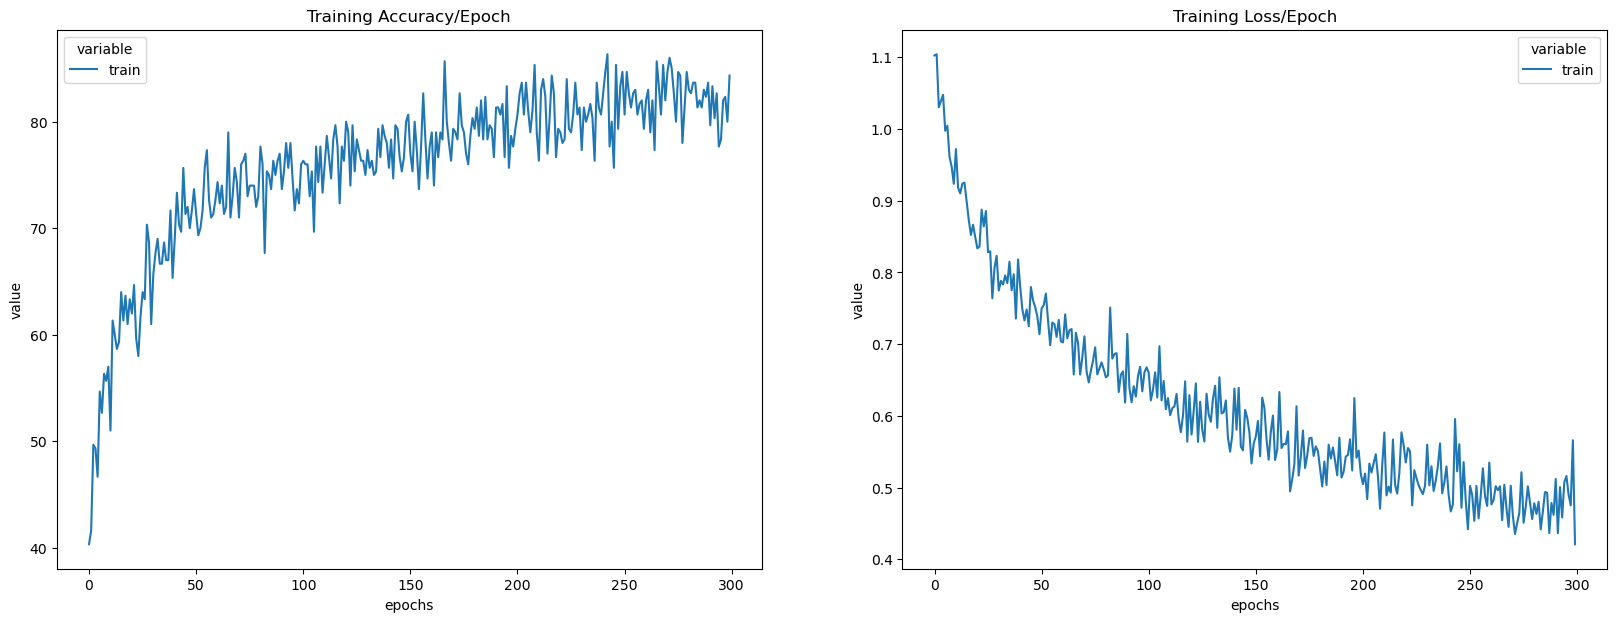

In [164]:
#Using the 3 Layer Network 
net1_c = network_pkmn(EPOCHS_3, BATCH_SIZE_3, LEARNING_RATE_3, 3)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       123
           1       0.63      0.73      0.68        83
           2       0.75      0.52      0.61        29

    accuracy                           0.75       235
   macro avg       0.74      0.69      0.71       235
weighted avg       0.76      0.75      0.75       235



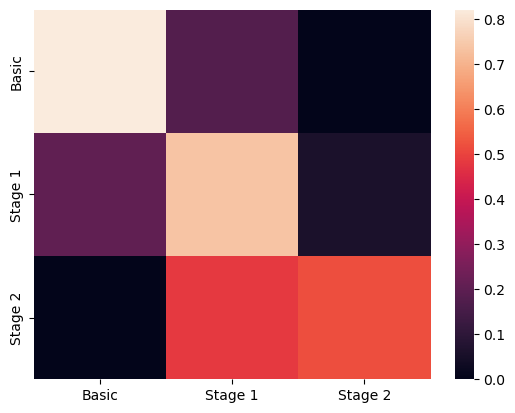

In [165]:
#Outputting the visual evaluation for 3L using the HP Set 3
eval_reports(net1_c['Test'], net1_c['Predicted'])

PokemonClassificationModel_4L(
  (layer1): Linear(in_features=11, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Begin training...


  1%|▏         | 4/300 [00:00<00:07, 37.17it/s]

Epoch 001: | Loss: 1.02839 | Acc: 49.333
Epoch 002: | Loss: 0.96033 | Acc: 54.333
Epoch 003: | Loss: 0.97648 | Acc: 56.667
Epoch 004: | Loss: 0.92302 | Acc: 64.000
Epoch 005: | Loss: 0.85611 | Acc: 65.667
Epoch 006: | Loss: 0.87095 | Acc: 66.000
Epoch 007: | Loss: 0.87759 | Acc: 64.333


  3%|▎         | 9/300 [00:00<00:07, 40.53it/s]

Epoch 008: | Loss: 0.82029 | Acc: 64.667
Epoch 009: | Loss: 0.82186 | Acc: 67.667


  5%|▍         | 14/300 [00:00<00:06, 41.87it/s]

Epoch 010: | Loss: 0.84282 | Acc: 67.333
Epoch 011: | Loss: 0.83140 | Acc: 70.333
Epoch 012: | Loss: 0.82256 | Acc: 69.667
Epoch 013: | Loss: 0.87994 | Acc: 66.000
Epoch 014: | Loss: 0.82120 | Acc: 71.667
Epoch 015: | Loss: 0.76776 | Acc: 74.333
Epoch 016: | Loss: 0.82325 | Acc: 64.667
Epoch 017: | Loss: 0.79360 | Acc: 70.000
Epoch 018: | Loss: 0.76742 | Acc: 70.667


  6%|▋         | 19/300 [00:00<00:06, 41.63it/s]

Epoch 019: | Loss: 0.79181 | Acc: 70.000
Epoch 020: | Loss: 0.75991 | Acc: 74.000
Epoch 021: | Loss: 0.74779 | Acc: 71.000
Epoch 022: | Loss: 0.73028 | Acc: 74.000
Epoch 023: | Loss: 0.73084 | Acc: 75.000


  8%|▊         | 24/300 [00:00<00:06, 43.77it/s]

Epoch 024: | Loss: 0.74445 | Acc: 71.667
Epoch 025: | Loss: 0.71311 | Acc: 75.333
Epoch 026: | Loss: 0.73903 | Acc: 74.000


 10%|▉         | 29/300 [00:00<00:06, 44.19it/s]

Epoch 027: | Loss: 0.73914 | Acc: 75.667
Epoch 028: | Loss: 0.76700 | Acc: 71.333
Epoch 029: | Loss: 0.71347 | Acc: 71.333


 11%|█▏        | 34/300 [00:00<00:05, 45.25it/s]

Epoch 030: | Loss: 0.76324 | Acc: 69.000
Epoch 031: | Loss: 0.68362 | Acc: 76.667
Epoch 032: | Loss: 0.72913 | Acc: 72.333
Epoch 033: | Loss: 0.65384 | Acc: 77.333
Epoch 034: | Loss: 0.71672 | Acc: 74.000
Epoch 035: | Loss: 0.70196 | Acc: 74.333
Epoch 036: | Loss: 0.70162 | Acc: 74.667
Epoch 037: | Loss: 0.66448 | Acc: 77.000
Epoch 038: | Loss: 0.69480 | Acc: 76.000


 15%|█▍        | 44/300 [00:01<00:05, 45.33it/s]

Epoch 039: | Loss: 0.67539 | Acc: 75.000
Epoch 040: | Loss: 0.68009 | Acc: 77.000
Epoch 041: | Loss: 0.69051 | Acc: 74.000
Epoch 042: | Loss: 0.70065 | Acc: 71.667
Epoch 043: | Loss: 0.65365 | Acc: 73.000
Epoch 044: | Loss: 0.64874 | Acc: 81.000
Epoch 045: | Loss: 0.66049 | Acc: 78.667
Epoch 046: | Loss: 0.69826 | Acc: 76.333
Epoch 047: | Loss: 0.68630 | Acc: 74.333
Epoch 048: | Loss: 0.66929 | Acc: 75.000


 16%|█▋        | 49/300 [00:01<00:05, 44.60it/s]

Epoch 049: | Loss: 0.67603 | Acc: 75.000
Epoch 050: | Loss: 0.62895 | Acc: 76.000
Epoch 051: | Loss: 0.67547 | Acc: 74.667
Epoch 052: | Loss: 0.65816 | Acc: 76.333
Epoch 053: | Loss: 0.66883 | Acc: 73.333


 18%|█▊        | 54/300 [00:01<00:05, 45.10it/s]

Epoch 054: | Loss: 0.66855 | Acc: 73.000
Epoch 055: | Loss: 0.62625 | Acc: 79.000
Epoch 056: | Loss: 0.69757 | Acc: 70.333
Epoch 057: | Loss: 0.60486 | Acc: 81.333
Epoch 058: | Loss: 0.64018 | Acc: 73.333


 21%|██▏       | 64/300 [00:01<00:05, 46.16it/s]

Epoch 059: | Loss: 0.63839 | Acc: 73.333
Epoch 060: | Loss: 0.64854 | Acc: 77.333
Epoch 061: | Loss: 0.63519 | Acc: 75.667
Epoch 062: | Loss: 0.60226 | Acc: 80.000
Epoch 063: | Loss: 0.64489 | Acc: 76.333
Epoch 064: | Loss: 0.67654 | Acc: 74.333
Epoch 065: | Loss: 0.59852 | Acc: 76.333
Epoch 066: | Loss: 0.63766 | Acc: 76.000
Epoch 067: | Loss: 0.60333 | Acc: 78.333
Epoch 068: | Loss: 0.61260 | Acc: 77.333


 23%|██▎       | 69/300 [00:01<00:05, 45.55it/s]

Epoch 069: | Loss: 0.61555 | Acc: 78.667
Epoch 070: | Loss: 0.58652 | Acc: 76.333
Epoch 071: | Loss: 0.63863 | Acc: 78.000
Epoch 072: | Loss: 0.58658 | Acc: 81.333
Epoch 073: | Loss: 0.59595 | Acc: 80.333


 25%|██▍       | 74/300 [00:01<00:04, 46.80it/s]

Epoch 074: | Loss: 0.58444 | Acc: 78.667
Epoch 075: | Loss: 0.56703 | Acc: 79.667
Epoch 076: | Loss: 0.61196 | Acc: 79.333
Epoch 077: | Loss: 0.58564 | Acc: 78.333
Epoch 078: | Loss: 0.59314 | Acc: 75.333


 26%|██▋       | 79/300 [00:01<00:04, 47.03it/s]

Epoch 079: | Loss: 0.60330 | Acc: 77.667
Epoch 080: | Loss: 0.66180 | Acc: 74.667
Epoch 081: | Loss: 0.56988 | Acc: 79.667
Epoch 082: | Loss: 0.60821 | Acc: 73.667
Epoch 083: | Loss: 0.58315 | Acc: 77.667


 30%|██▉       | 89/300 [00:02<00:06, 31.24it/s]

Epoch 084: | Loss: 0.59412 | Acc: 78.667
Epoch 085: | Loss: 0.58180 | Acc: 77.667
Epoch 086: | Loss: 0.60253 | Acc: 78.333
Epoch 087: | Loss: 0.55024 | Acc: 83.333
Epoch 088: | Loss: 0.55395 | Acc: 80.333
Epoch 089: | Loss: 0.58011 | Acc: 79.000
Epoch 090: | Loss: 0.61606 | Acc: 77.000
Epoch 091: | Loss: 0.56896 | Acc: 77.000
Epoch 092: | Loss: 0.58276 | Acc: 81.000
Epoch 093: | Loss: 0.55036 | Acc: 80.333


 35%|███▍      | 104/300 [00:02<00:04, 39.78it/s]

Epoch 094: | Loss: 0.58568 | Acc: 77.667
Epoch 095: | Loss: 0.60077 | Acc: 77.000
Epoch 096: | Loss: 0.56923 | Acc: 77.667
Epoch 097: | Loss: 0.56987 | Acc: 79.333
Epoch 098: | Loss: 0.58305 | Acc: 77.667
Epoch 099: | Loss: 0.57966 | Acc: 78.667
Epoch 100: | Loss: 0.58074 | Acc: 76.333
Epoch 101: | Loss: 0.55885 | Acc: 79.667
Epoch 102: | Loss: 0.60208 | Acc: 75.667
Epoch 103: | Loss: 0.57150 | Acc: 78.333
Epoch 104: | Loss: 0.54707 | Acc: 77.333


 38%|███▊      | 114/300 [00:02<00:04, 43.25it/s]

Epoch 105: | Loss: 0.55081 | Acc: 81.667
Epoch 106: | Loss: 0.58505 | Acc: 78.333
Epoch 107: | Loss: 0.55988 | Acc: 81.000
Epoch 108: | Loss: 0.55854 | Acc: 81.000
Epoch 109: | Loss: 0.56891 | Acc: 80.667
Epoch 110: | Loss: 0.54306 | Acc: 81.333
Epoch 111: | Loss: 0.55554 | Acc: 80.667
Epoch 112: | Loss: 0.60738 | Acc: 76.667
Epoch 113: | Loss: 0.55731 | Acc: 79.333
Epoch 114: | Loss: 0.52195 | Acc: 80.667


 41%|████▏     | 124/300 [00:02<00:03, 44.94it/s]

Epoch 115: | Loss: 0.52007 | Acc: 79.667
Epoch 116: | Loss: 0.54160 | Acc: 81.667
Epoch 117: | Loss: 0.52410 | Acc: 80.000
Epoch 118: | Loss: 0.55547 | Acc: 80.667
Epoch 119: | Loss: 0.53188 | Acc: 79.667
Epoch 120: | Loss: 0.54036 | Acc: 76.667
Epoch 121: | Loss: 0.50598 | Acc: 81.333
Epoch 122: | Loss: 0.51851 | Acc: 79.000
Epoch 123: | Loss: 0.52252 | Acc: 80.000
Epoch 124: | Loss: 0.52532 | Acc: 78.667


 43%|████▎     | 129/300 [00:03<00:03, 44.16it/s]

Epoch 125: | Loss: 0.52280 | Acc: 80.667
Epoch 126: | Loss: 0.50453 | Acc: 85.333
Epoch 127: | Loss: 0.51671 | Acc: 81.333
Epoch 128: | Loss: 0.55503 | Acc: 80.333
Epoch 129: | Loss: 0.54452 | Acc: 79.333
Epoch 130: | Loss: 0.52547 | Acc: 81.333
Epoch 131: | Loss: 0.52310 | Acc: 79.000
Epoch 132: | Loss: 0.50167 | Acc: 81.333
Epoch 133: | Loss: 0.49373 | Acc: 82.667


 48%|████▊     | 144/300 [00:03<00:03, 45.94it/s]

Epoch 134: | Loss: 0.52062 | Acc: 80.667
Epoch 135: | Loss: 0.51628 | Acc: 81.000
Epoch 136: | Loss: 0.51888 | Acc: 82.667
Epoch 137: | Loss: 0.49501 | Acc: 81.000
Epoch 138: | Loss: 0.50599 | Acc: 81.333
Epoch 139: | Loss: 0.51898 | Acc: 80.667
Epoch 140: | Loss: 0.54329 | Acc: 80.000
Epoch 141: | Loss: 0.48866 | Acc: 84.333
Epoch 142: | Loss: 0.53314 | Acc: 80.333
Epoch 143: | Loss: 0.50101 | Acc: 81.333
Epoch 144: | Loss: 0.46997 | Acc: 82.667


 51%|█████▏    | 154/300 [00:03<00:03, 46.76it/s]

Epoch 145: | Loss: 0.48107 | Acc: 83.667
Epoch 146: | Loss: 0.56027 | Acc: 77.333
Epoch 147: | Loss: 0.49225 | Acc: 83.333
Epoch 148: | Loss: 0.52602 | Acc: 81.333
Epoch 149: | Loss: 0.51800 | Acc: 79.000
Epoch 150: | Loss: 0.46429 | Acc: 81.667
Epoch 151: | Loss: 0.47605 | Acc: 84.333
Epoch 152: | Loss: 0.51097 | Acc: 79.000
Epoch 153: | Loss: 0.45643 | Acc: 82.667
Epoch 154: | Loss: 0.52218 | Acc: 80.000


 55%|█████▍    | 164/300 [00:03<00:02, 47.05it/s]

Epoch 155: | Loss: 0.51191 | Acc: 78.667
Epoch 156: | Loss: 0.47580 | Acc: 82.333
Epoch 157: | Loss: 0.47782 | Acc: 82.333
Epoch 158: | Loss: 0.49355 | Acc: 81.667
Epoch 159: | Loss: 0.45324 | Acc: 83.333
Epoch 160: | Loss: 0.51194 | Acc: 76.667
Epoch 161: | Loss: 0.48222 | Acc: 83.000
Epoch 162: | Loss: 0.47388 | Acc: 83.000
Epoch 163: | Loss: 0.50793 | Acc: 79.333
Epoch 164: | Loss: 0.49986 | Acc: 82.000


 58%|█████▊    | 174/300 [00:04<00:02, 45.27it/s]

Epoch 165: | Loss: 0.47397 | Acc: 82.333
Epoch 166: | Loss: 0.46117 | Acc: 85.667
Epoch 167: | Loss: 0.50869 | Acc: 81.000
Epoch 168: | Loss: 0.43168 | Acc: 87.000
Epoch 169: | Loss: 0.48889 | Acc: 82.333
Epoch 170: | Loss: 0.44561 | Acc: 85.333
Epoch 171: | Loss: 0.45523 | Acc: 85.000
Epoch 172: | Loss: 0.48244 | Acc: 81.333
Epoch 173: | Loss: 0.42282 | Acc: 88.667
Epoch 174: | Loss: 0.43286 | Acc: 86.333


 60%|█████▉    | 179/300 [00:04<00:02, 45.19it/s]

Epoch 175: | Loss: 0.50662 | Acc: 80.333
Epoch 176: | Loss: 0.45301 | Acc: 85.333
Epoch 177: | Loss: 0.44046 | Acc: 85.000
Epoch 178: | Loss: 0.48095 | Acc: 84.000
Epoch 179: | Loss: 0.46276 | Acc: 84.333
Epoch 180: | Loss: 0.45838 | Acc: 84.333
Epoch 181: | Loss: 0.44706 | Acc: 85.333
Epoch 182: | Loss: 0.42274 | Acc: 84.667
Epoch 183: | Loss: 0.46319 | Acc: 85.333


 63%|██████▎   | 189/300 [00:04<00:02, 45.91it/s]

Epoch 184: | Loss: 0.47092 | Acc: 84.000
Epoch 185: | Loss: 0.47188 | Acc: 81.333
Epoch 186: | Loss: 0.42788 | Acc: 86.333
Epoch 187: | Loss: 0.48118 | Acc: 81.667
Epoch 188: | Loss: 0.40389 | Acc: 88.667
Epoch 189: | Loss: 0.44998 | Acc: 84.667
Epoch 190: | Loss: 0.45956 | Acc: 85.333
Epoch 191: | Loss: 0.40472 | Acc: 87.667
Epoch 192: | Loss: 0.47003 | Acc: 84.667
Epoch 193: | Loss: 0.43517 | Acc: 86.667


 66%|██████▋   | 199/300 [00:04<00:02, 46.05it/s]

Epoch 194: | Loss: 0.41849 | Acc: 84.333
Epoch 195: | Loss: 0.44753 | Acc: 83.333
Epoch 196: | Loss: 0.47717 | Acc: 84.000
Epoch 197: | Loss: 0.43268 | Acc: 86.000
Epoch 198: | Loss: 0.44355 | Acc: 82.667
Epoch 199: | Loss: 0.43788 | Acc: 84.000
Epoch 200: | Loss: 0.43307 | Acc: 84.000
Epoch 201: | Loss: 0.41066 | Acc: 86.667
Epoch 202: | Loss: 0.44270 | Acc: 84.667
Epoch 203: | Loss: 0.44902 | Acc: 83.000


 70%|██████▉   | 209/300 [00:04<00:01, 47.06it/s]

Epoch 204: | Loss: 0.41645 | Acc: 84.333
Epoch 205: | Loss: 0.42040 | Acc: 87.000
Epoch 206: | Loss: 0.40524 | Acc: 84.333
Epoch 207: | Loss: 0.40241 | Acc: 88.333
Epoch 208: | Loss: 0.43711 | Acc: 85.000
Epoch 209: | Loss: 0.42401 | Acc: 84.333
Epoch 210: | Loss: 0.40972 | Acc: 85.000
Epoch 211: | Loss: 0.43679 | Acc: 83.667
Epoch 212: | Loss: 0.46117 | Acc: 80.667
Epoch 213: | Loss: 0.40599 | Acc: 84.000


 73%|███████▎  | 219/300 [00:05<00:01, 45.76it/s]

Epoch 214: | Loss: 0.43159 | Acc: 83.333
Epoch 215: | Loss: 0.38455 | Acc: 86.667
Epoch 216: | Loss: 0.42319 | Acc: 85.333
Epoch 217: | Loss: 0.44987 | Acc: 81.667
Epoch 218: | Loss: 0.42659 | Acc: 82.333
Epoch 219: | Loss: 0.41833 | Acc: 84.000
Epoch 220: | Loss: 0.45973 | Acc: 79.667
Epoch 221: | Loss: 0.50979 | Acc: 80.000
Epoch 222: | Loss: 0.43251 | Acc: 85.333


 76%|███████▋  | 229/300 [00:05<00:01, 45.10it/s]

Epoch 223: | Loss: 0.41890 | Acc: 85.667
Epoch 224: | Loss: 0.47443 | Acc: 79.667
Epoch 225: | Loss: 0.37345 | Acc: 89.333
Epoch 226: | Loss: 0.42990 | Acc: 87.000
Epoch 227: | Loss: 0.38860 | Acc: 87.000
Epoch 228: | Loss: 0.36445 | Acc: 88.000
Epoch 229: | Loss: 0.42453 | Acc: 85.000
Epoch 230: | Loss: 0.41319 | Acc: 87.333
Epoch 231: | Loss: 0.41195 | Acc: 83.000
Epoch 232: | Loss: 0.39761 | Acc: 85.000
Epoch 233: | Loss: 0.39459 | Acc: 85.667


 80%|███████▉  | 239/300 [00:05<00:01, 45.61it/s]

Epoch 234: | Loss: 0.44327 | Acc: 82.333
Epoch 235: | Loss: 0.39292 | Acc: 85.667
Epoch 236: | Loss: 0.44570 | Acc: 83.000
Epoch 237: | Loss: 0.33109 | Acc: 91.333
Epoch 238: | Loss: 0.37927 | Acc: 89.667
Epoch 239: | Loss: 0.42023 | Acc: 85.000
Epoch 240: | Loss: 0.38299 | Acc: 85.667
Epoch 241: | Loss: 0.38627 | Acc: 88.000
Epoch 242: | Loss: 0.44042 | Acc: 84.667
Epoch 243: | Loss: 0.44660 | Acc: 80.667


 85%|████████▍ | 254/300 [00:05<00:00, 47.11it/s]

Epoch 244: | Loss: 0.37226 | Acc: 88.000
Epoch 245: | Loss: 0.38443 | Acc: 87.333
Epoch 246: | Loss: 0.38123 | Acc: 88.333
Epoch 247: | Loss: 0.36576 | Acc: 88.000
Epoch 248: | Loss: 0.38450 | Acc: 85.667
Epoch 249: | Loss: 0.34693 | Acc: 89.333
Epoch 250: | Loss: 0.40932 | Acc: 86.000
Epoch 251: | Loss: 0.37839 | Acc: 86.667
Epoch 252: | Loss: 0.40458 | Acc: 83.667
Epoch 253: | Loss: 0.43753 | Acc: 85.333
Epoch 254: | Loss: 0.38686 | Acc: 86.667


 86%|████████▋ | 259/300 [00:05<00:00, 46.85it/s]

Epoch 255: | Loss: 0.35825 | Acc: 86.667
Epoch 256: | Loss: 0.44171 | Acc: 82.000
Epoch 257: | Loss: 0.37960 | Acc: 87.000
Epoch 258: | Loss: 0.37181 | Acc: 87.333
Epoch 259: | Loss: 0.42195 | Acc: 83.333
Epoch 260: | Loss: 0.42138 | Acc: 85.000
Epoch 261: | Loss: 0.43187 | Acc: 83.333
Epoch 262: | Loss: 0.36119 | Acc: 89.333
Epoch 263: | Loss: 0.33802 | Acc: 89.667


 90%|████████▉ | 269/300 [00:06<00:00, 46.36it/s]

Epoch 264: | Loss: 0.34114 | Acc: 89.333
Epoch 265: | Loss: 0.36879 | Acc: 87.667
Epoch 266: | Loss: 0.39435 | Acc: 84.333
Epoch 267: | Loss: 0.34508 | Acc: 89.000
Epoch 268: | Loss: 0.35741 | Acc: 86.333
Epoch 269: | Loss: 0.38821 | Acc: 88.667
Epoch 270: | Loss: 0.35033 | Acc: 90.000
Epoch 271: | Loss: 0.36559 | Acc: 90.000
Epoch 272: | Loss: 0.42755 | Acc: 83.667
Epoch 273: | Loss: 0.34981 | Acc: 89.667


 93%|█████████▎| 279/300 [00:06<00:00, 46.75it/s]

Epoch 274: | Loss: 0.34240 | Acc: 90.667
Epoch 275: | Loss: 0.39659 | Acc: 86.000
Epoch 276: | Loss: 0.41836 | Acc: 83.333
Epoch 277: | Loss: 0.38361 | Acc: 88.000
Epoch 278: | Loss: 0.39339 | Acc: 86.333
Epoch 279: | Loss: 0.40278 | Acc: 87.000
Epoch 280: | Loss: 0.32570 | Acc: 87.667
Epoch 281: | Loss: 0.34184 | Acc: 87.333
Epoch 282: | Loss: 0.36509 | Acc: 88.333
Epoch 283: | Loss: 0.34746 | Acc: 86.333


 98%|█████████▊| 294/300 [00:06<00:00, 47.20it/s]

Epoch 284: | Loss: 0.35442 | Acc: 88.000
Epoch 285: | Loss: 0.32418 | Acc: 90.333
Epoch 286: | Loss: 0.32703 | Acc: 89.667
Epoch 287: | Loss: 0.31247 | Acc: 92.333
Epoch 288: | Loss: 0.36155 | Acc: 84.333
Epoch 289: | Loss: 0.35858 | Acc: 89.333
Epoch 290: | Loss: 0.32409 | Acc: 90.333
Epoch 291: | Loss: 0.36948 | Acc: 88.333
Epoch 292: | Loss: 0.37902 | Acc: 84.667
Epoch 293: | Loss: 0.34471 | Acc: 88.333
Epoch 294: | Loss: 0.32190 | Acc: 91.000


100%|██████████| 300/300 [00:06<00:00, 44.26it/s]
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\cmone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


Epoch 295: | Loss: 0.37530 | Acc: 87.000
Epoch 296: | Loss: 0.45115 | Acc: 83.000
Epoch 297: | Loss: 0.48095 | Acc: 82.667
Epoch 298: | Loss: 0.35597 | Acc: 88.333
Epoch 299: | Loss: 0.36487 | Acc: 85.667
Epoch 300: | Loss: 0.33860 | Acc: 89.667
Training Complete


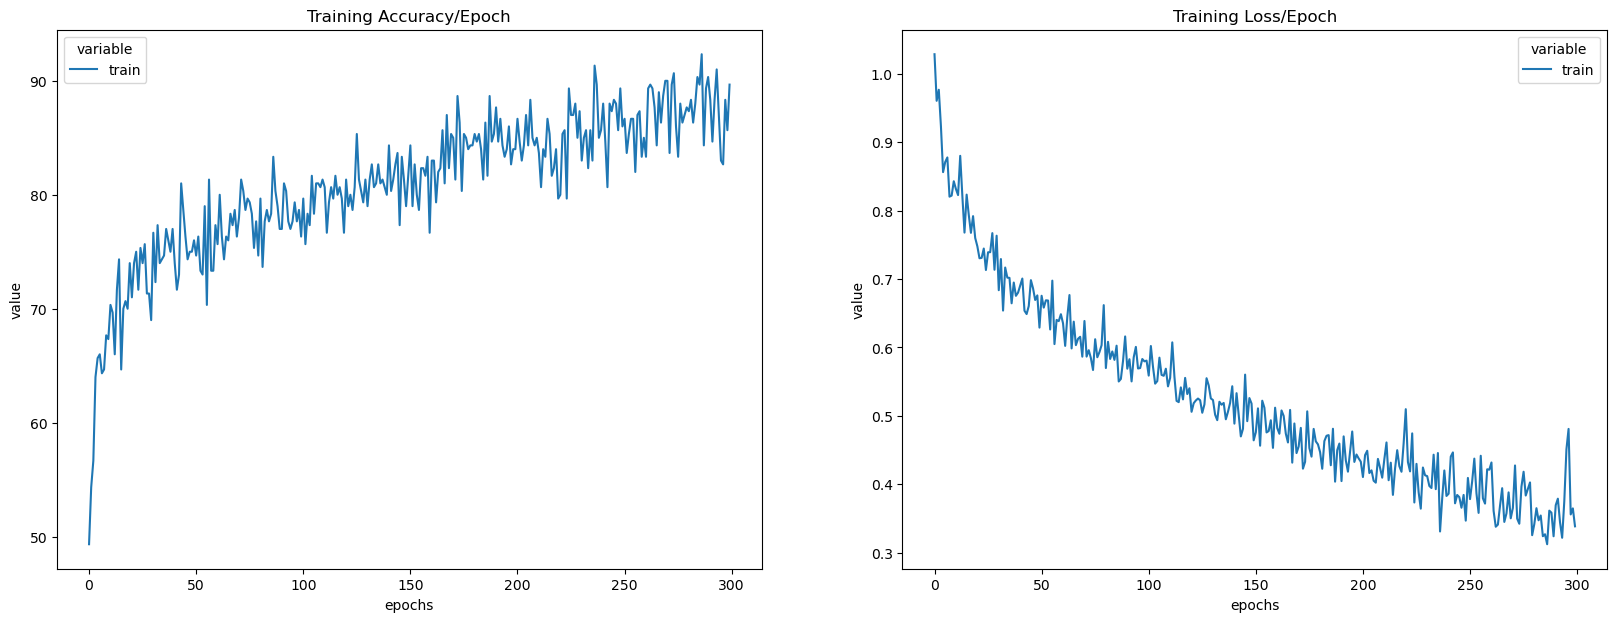

In [166]:
#Using the 4 Layer Network 
net2_c = network_pkmn(EPOCHS_3, BATCH_SIZE_3, LEARNING_RATE_3, 4)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       123
           1       0.69      0.77      0.73        83
           2       0.79      0.52      0.62        29

    accuracy                           0.79       235
   macro avg       0.78      0.72      0.74       235
weighted avg       0.79      0.79      0.79       235



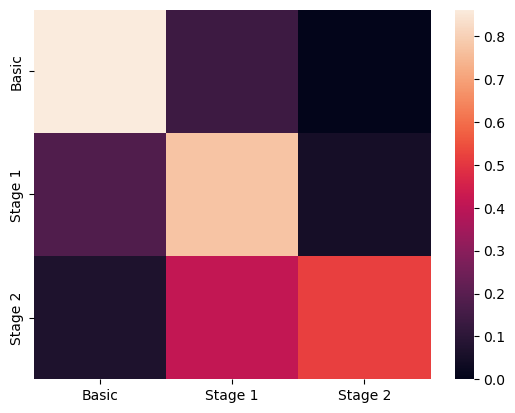

In [167]:
#Outputting the visual evaluation for 4L using the HP Set 3
eval_reports(net2_c['Test'], net2_c['Predicted'])

This uses a third set of hyperparameters of **Epochs**, **Batch Size** & **Learning Rate** for both a *3 Layer* & *4 Layer* to get a true variety of differing inputs to see the effects it has on the model.

## Choosing the optimal model <a id = "opt"></a>

### Visualisation of the chosen **optimal** model <a id = "vis"></a>

In [168]:
def check_optimal_model(model):
    pokemon = dataset.sample()
    pokemon_name = pokemon['name'].values[0].title()
    pokemon_actual = pokemon['stage'].values[0]
    #print(pokemon_actual)
    pokemon = pokemon[dataset_cleaned.columns].values[0][:-1]
    
    if pokemon_actual == 0:
        pokemon_actual = "Basic"
    elif pokemon_actual == 1:
        pokemon_actual = "Stage 1"
    else:
        pokemon_actual = "Stage 2"
    
    
    pokemon = scaler.transform(pokemon.reshape(1, -1))
    pokemon = torch.from_numpy(pokemon).float()
    
    
    y_pred_list = []
    model.eval()
    with torch.no_grad():
        y_pred = model(pokemon.to(device))
        _, y_pred = torch.max(y_pred, dim=1)
        y_pred_list.append(y_pred.cpu().numpy())
    
    y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
    
    if y_pred_list[0] == 0:
        predicted = "Basic"
    elif y_pred_list[0] == 1:
        predicted = "Stage 1"
    else:
        predicted = "Stage 2"
    
    img = Image.open(f'data/pkmn_img/{pokemon_name.lower()}.png')
    print(f'Pokemon: {pokemon_name}')
    print(f'Predicted: {predicted}')
    print(f'Actual: {pokemon_actual}')
    return img

This takes the model with the **highest accuracy**, and evaluates it, but it uses a **random Pokemon** from the entire dataset. This checks it predictive capabilities, and I have also added the aspect that it will show the **image of the Pokemon** for reference (essentially another dataset that just uses the name to find the image of it).

### Comparison of the built models produced <a id = "compare"></a>

Model B - 4 Layer Version - has the best accuracy with 89.800 using Epoch: 150, Batch Size: 128 & Learning rate 0.0002
Pokemon: Toucannon
Predicted: Stage 2
Actual: Stage 2


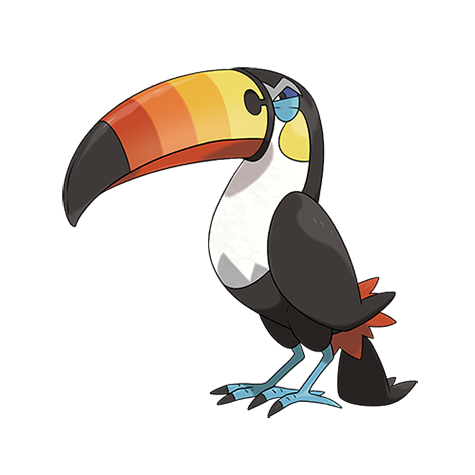

In [169]:
acc_list = []

model_a_3L_acc = net1_a['Accuracy']
model_a_4L_acc = net2_a['Accuracy']
model_b_3L_acc = net1_b['Accuracy']
model_b_4L_acc = net2_b['Accuracy']
model_c_3L_acc = net1_c['Accuracy']
model_c_4L_acc = net2_c['Accuracy']

acc_list.append(model_a_3L_acc)
acc_list.append(model_a_4L_acc)
acc_list.append(model_b_3L_acc)
acc_list.append(model_b_4L_acc)
acc_list.append(model_c_3L_acc)
acc_list.append(model_c_4L_acc)

acc_max = max(acc_list)

if acc_max == model_a_3L_acc:
    print(f'Model A - 3 Layer Version - has the best accuracy with {model_a_3L_acc:.3f} using Epoch: {EPOCHS_1}, Batch Size: {BATCH_SIZE_1} & Learning rate {LEARNING_RATE_1}')
    img = check_optimal_model(net1_a['Model'])
elif acc_max == model_a_4L_acc:
    print(f'Model A - 4 Layer Version - has the best accuracy with {model_a_4L_acc:.3f} using Epoch: {EPOCHS_1}, Batch Size: {BATCH_SIZE_1} & Learning rate {LEARNING_RATE_1}')
    img = check_optimal_model(net2_a['Model'])
elif acc_max == model_b_3L_acc:
    print(f'Model B - 3 Layer Version - has the best accuracy with {model_b_3L_acc:.3f} using Epoch: {EPOCHS_2}, Batch Size: {BATCH_SIZE_2} & Learning rate {LEARNING_RATE_2}')
    img = check_optimal_model(net1_b['Model'])
elif acc_max == model_b_4L_acc:
    print(f'Model B - 4 Layer Version - has the best accuracy with {model_b_4L_acc:.3f} using Epoch: {EPOCHS_2}, Batch Size: {BATCH_SIZE_2} & Learning rate {LEARNING_RATE_2}')
    img = check_optimal_model(net2_b['Model'])
elif acc_max == model_c_3L_acc:
    print(f'Model C - 3 Layer Version - has the best accuracy with {model_c_3L_acc:.3f} using Epoch: {EPOCHS_3}, Batch Size: {BATCH_SIZE_3} & Learning rate {LEARNING_RATE_3}')
    img = check_optimal_model(net1_c['Model'])
else:
    print(f'Model c - 4 Layer Version - has the best accuracy with {model_c_4L_acc:.3f} using Epoch: {EPOCHS_3}, Batch Size: {BATCH_SIZE_3} & Learning rate {LEARNING_RATE_3}')
    img = check_optimal_model(net2_c['Model'])

img

This compares the **accuracy** of all the models that were built, and takes the max, gives the details of the *hyperparameters* and the *model*, and gets a visual version of the model so that you can see it working yourself.

## Bibliography & Reading <a id = "read"></a>

Zach (2022). How to Interpret the Classification Report in sklearn (With Example). [online] Statology. Available at: https://www.statology.org/sklearn-classification-report/.

Educative. (n.d.). Batch normalization implementation in PyTorch. [online] Available at: https://www.educative.io/answers/batch-normalization-implementation-in-pytorch

Shukla, L. (2020). Implementing Dropout Regularization in PyTorch. [online] W&B. Available at: https://wandb.ai/authors/ayusht/reports/Implementing-Dropout-Regularization-in-PyTorch--VmlldzoxNTgwOTE

Verma, A. (2021). PyTorch [Tabular] —Multiclass Classification. [online] Medium. Available at: https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab

Kundu, R. (2022). Confusion Matrix: How To Use It & Interpret Results [Examples]. [online] www.v7labs.com. Available at: https://www.v7labs.com/blog/confusion-matrix-guide.

Jain, R. (2020). Pokemon Classifier with PyTorch. [online] Medium. Available at: https://medium.com/@rjrjrjrj1996/pokemon-classifier-with-pytorch-656ed7fcc7bb

Meinardus, B. (2022). Binary Classification with PyTorch and Pokémon — Part 1. [online] Medium. Available at: https://medium.com/@boris.meinardus/binary-classification-with-pytorch-and-pok%C3%A9mon-part-1-288cf7a852c0

https://www.learnpytorch.io/02_pytorch_classification/